### Multi-Class Text Classification with Scikit-Learn – Towards Data Science

Classifying Consumer Finance Complaints into 12 pre-defined classes. 

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

### 1. loading data 

In [1]:
# importing pandas package 
import pandas as pd

# making data frame from csv file 
df = pd.read_csv('Consumer_Complaints.csv')




### 2. Data exploration

In [2]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [3]:
# show the info of the data  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 19 columns):
Date received                   1025010 non-null object
Product                         1025010 non-null object
Sub-product                     789840 non-null object
Issue                           1025010 non-null object
Sub-issue                       528853 non-null object
Consumer Complaint              277814 non-null object
Company Public Response         318364 non-null object
Company                         1025010 non-null object
State                           1012650 non-null object
ZIP code                        1008292 non-null object
Tags                            141588 non-null object
Consumer consent provided?      491911 non-null object
Submitted via                   1025010 non-null object
Date Sent to Company            1025010 non-null object
Company Response to Consumer    1025007 non-null object
Timely response?                1025010 non-null obje

### 3. data clean

In [4]:
# Syntax
# pd.notnull(“DataFrame Name”) 

# creating bool series True for NaN values 
not_null_columns = pd.notnull(df['Consumer Complaint'])

# filtering data 
df = df[not_null_columns]


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277814 entries, 1 to 1025009
Data columns (total 19 columns):
Date received                   277814 non-null object
Product                         277814 non-null object
Sub-product                     225631 non-null object
Issue                           277814 non-null object
Sub-issue                       178874 non-null object
Consumer Complaint              277814 non-null object
Company Public Response         135323 non-null object
Company                         277814 non-null object
State                           276758 non-null object
ZIP code                        275414 non-null object
Tags                            47538 non-null object
Consumer consent provided?      277814 non-null object
Submitted via                   277814 non-null object
Date Sent to Company            277814 non-null object
Company Response to Consumer    277813 non-null object
Timely response?                277814 non-null object
Consumer 

In [5]:
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
7,06/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,Company chooses not to provide a public response,Experian Information Solutions Inc.,VA,224XX,NaN,Consent provided,Web,06/15/2015,Closed with explanation,Yes,No,1420702,NaN
12,02-03-2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,NaN,"The CBE Group, Inc.",TX,752XX,NaN,Consent provided,Web,02-03-2016,Closed with explanation,Yes,Yes,1772196,NaN
16,02/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,Company has responded to the consumer and the ...,SQUARETWO FINANCIAL CORPORATION,NE,693XX,NaN,Consent provided,Web,03-04-2016,Closed with explanation,Yes,Yes,1790634,NaN


### 4. feature selection

In [6]:
# For this project, we need only two columns — “Product” and “Consumer complaint narrative”.
# column manupilation 

selected_columns = ['Product', 'Consumer Complaint']

# get the new df
df = df[selected_columns]

# check the new df's columns
df.columns

Index(['Product', 'Consumer Complaint'], dtype='object')

In [7]:
# rename the columns

df.columns = ['Product', 'Consumer_complaint_narrative']
df.columns

Index(['Product', 'Consumer_complaint_narrative'], dtype='object')

In [8]:
# check the new df 
df.head()

,Product,Consumer_complaint_narrative
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...


In [9]:
# add a new column
# add a column encoding the product as an integer 
df['category_id'] = pd.factorize(df['Product'])[0]

# another example
# df['category_id'] = df['Product'].factorize()[0]


df.head(5)

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [10]:
# managing data as file object

from io import StringIO

category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

category_id_df

,Product,category_id
1,Credit reporting,0
2,Consumer Loan,1
12,Debt collection,2
25,Mortgage,3
36,Credit card,4
90,Other financial service,5
124,Bank account or service,6
152,Student loan,7
168,Money transfers,8
538,Payday loan,9


In [11]:
category_to_id = dict(category_id_df.values)
category_to_id

{'Credit reporting': 0,
 'Consumer Loan': 1,
 'Debt collection': 2,
 'Mortgage': 3,
 'Credit card': 4,
 'Other financial service': 5,
 'Bank account or service': 6,
 'Student loan': 7,
 'Money transfers': 8,
 'Payday loan': 9,
 'Prepaid card': 10,
 'Money transfer, virtual currency, or money service': 11,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Checking or savings account': 13,
 'Vehicle loan or lease': 14,
 'Credit card or prepaid card': 15,
 'Virtual currency': 16,
 'Payday loan, title loan, or personal loan': 17}

In [12]:

id_to_category = dict(category_id_df[['category_id', 'Product']].values)
id_to_category

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card',
 16: 'Virtual currency',
 17: 'Payday loan, title loan, or personal loan'}

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277814 entries, 1 to 1025009
Data columns (total 3 columns):
Product                         277814 non-null object
Consumer_complaint_narrative    277814 non-null object
category_id                     277814 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.5+ MB


In [14]:
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6)) # 800 * 600

df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)

plt.show() # run 2 times, if the figure doesn't show up

<Figure size 800x600 with 1 Axes>

In [16]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


tf_count_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=1000,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)



tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, 
                        max_features=1000,                                   
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')



In [17]:
labels = df.category_id

labels

1          0
2          1
7          0
12         2
16         2
25         3
26         3
28         0
29         3
36         4
43         4
49         2
61         0
64         0
69         3
80         0
83         0
85         3
90         5
95         3
98         4
99         0
103        0
107        2
118        3
124        6
136        6
152        7
153        6
154        1
          ..
1024923    2
1024928    1
1024930    2
1024933    2
1024934    1
1024935    3
1024944    3
1024946    2
1024950    1
1024951    0
1024954    4
1024955    4
1024956    1
1024959    3
1024962    3
1024964    2
1024966    3
1024972    2
1024973    0
1024979    2
1024984    7
1024986    3
1024990    6
1024992    2
1025000    4
1025002    2
1025003    6
1025006    2
1025007    3
1025009    2
Name: category_id, Length: 277814, dtype: int64

In [18]:
# features = tfidf_vectorizer.fit_transform(df.Consumer_complaint_narrative).toarray()
#features.shape


features = tfidf_vectorizer.fit_transform(df.Consumer_complaint_narrative)

features.shape


(277814, 1000)

In [19]:
# to find the terms that are the most correlated with each of the products:

from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
    
  features_chi2 = chi2(features, labels == category_id)

  indices = np.argsort(features_chi2[0])
    
  feature_names = np.array(tfidf_vectorizer.get_feature_names())[indices]

  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]

  print("# '{}':".format(Product))
    
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))

  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . bank
       . overdraft
  . Most correlated bigrams:
       . debit card
       . checking account
# 'Checking or savings account':
  . Most correlated unigrams:
       . overdraft
       . deposit
  . Most correlated bigrams:
       . debit card
       . checking account
# 'Consumer Loan':
  . Most correlated unigrams:
       . car
       . vehicle
  . Most correlated bigrams:
       . payment xxxx
       . xxxx payments
# 'Credit card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . american express
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . cards
       . card
  . Most correlated bigrams:
       . american express
       . credit card
# 'Credit reporting':
  . Most correlated unigrams:
       . equifax
       . experian
  . Most correlated bigrams:
       . report xxxx
       . credit report
# 'Credit reporting, credit

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

In [21]:
X_train.shape

(208360,)

In [22]:
y_train.shape

(208360,)

In [23]:
X_test.shape

(69454,)

In [24]:
y_test.shape

(69454,)

In [25]:
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [26]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [27]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id
12,Debt collection,This company refuses to provide me verificatio...,2


In [28]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [29]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id
61,Credit reporting,I am disputing the inaccurate information the ...,0


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []



In [31]:

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

In [32]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

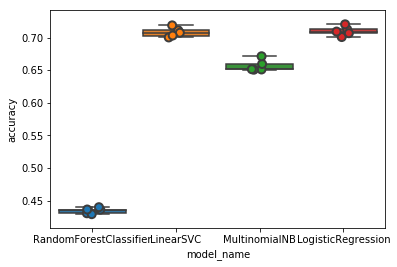

In [33]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [34]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.708082
LogisticRegression        0.709910
MultinomialNB             0.656842
RandomForestClassifier    0.434608
Name: accuracy, dtype: float64

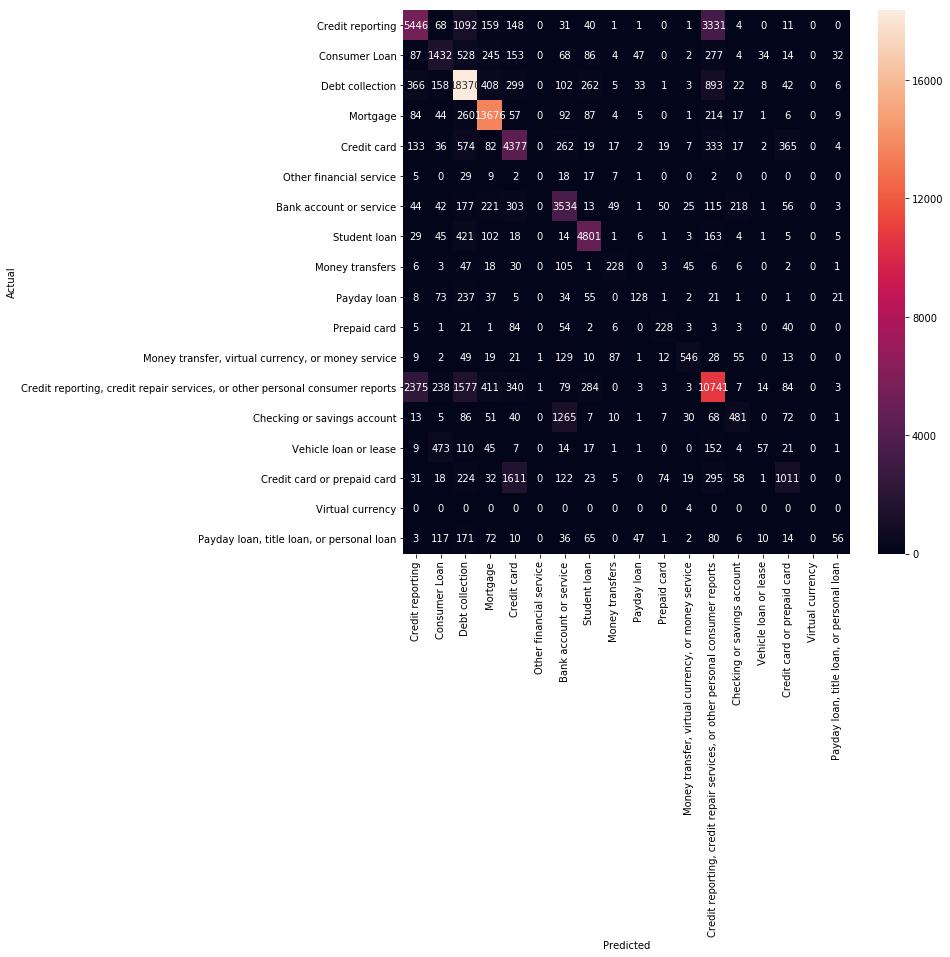

In [35]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Consumer Loan' predicted as 'Credit reporting' : 87 examples.


,Product,Consumer_complaint_narrative
769677,Consumer Loan,The attached company claims that the account w...
21638,Consumer Loan,I was offered a refi on my Audi Q5 when stoppi...
717836,Consumer Loan,This company have put a duplicate accounts on ...
7107,Consumer Loan,"While reviewing my XXXX credit report, I notic..."
439463,Consumer Loan,This loan has been paid and is only due for XX...
565615,Consumer Loan,I have reviewed my XXXX Credit Report and have...
484342,Consumer Loan,"Background : I filed Chapter XXXX BK in XXXX, ..."
776112,Consumer Loan,I purchased a laptop computer on line from XXX...
366906,Consumer Loan,GM FINANCIAL STILL CONTINUES TO REPORT THIS AN...
538932,Consumer Loan,THERE ARE XXXX INQUIRES ON MY CREDIT REPORT DA...



'Debt collection' predicted as 'Credit reporting' : 366 examples.


,Product,Consumer_complaint_narrative
352313,Debt collection,I have Medicaid and have so I do not know why ...
948034,Debt collection,They replied to my first complaint and removed...
888667,Debt collection,I am writing about a collection on my experian...
649087,Debt collection,"I KNOW NO COMPANY OF XXXX XXXX, I NEVER LIVED ..."
769529,Debt collection,CONTINUES TO REPORT AS A NEGATIVE ACCOUNT ALSO...
527756,Debt collection,XXXX KEPT COLLECTING ON THE TRADELINE OWNED BY...
563926,Debt collection,XXXX XXXX is reporting that I owe them {$280.0...
443356,Debt collection,Southwest credit collection agency continues t...
80831,Debt collection,TO WHOM IT MAY CONCERN-THIS ACCOUNTIS REPORTIN...
957730,Debt collection,"Dear Customer Care, I would like to inform you..."



'Mortgage' predicted as 'Credit reporting' : 84 examples.


,Product,Consumer_complaint_narrative
688812,Mortgage,transunion credit reporting refuses to correct...
606139,Mortgage,Experian 's credit report still has not update...
401493,Mortgage,This is a follow-up to claim # XXXX which I ha...
785139,Mortgage,i have a reverse mortage with reverse mortage ...
146058,Mortgage,Real Time Resolutions sends a request to all C...
554011,Mortgage,The Law is the Law! Statue of Limitations law ...
277302,Mortgage,"see attached, We have never received any respo..."
21443,Mortgage,Here 's the documentation you requested. As I ...
202210,Mortgage,"Hello, Transunion has me with a comment : "" XX..."
526250,Mortgage,"1 ) My son and I are XXXX, and XXXX generation..."



'Credit card' predicted as 'Credit reporting' : 133 examples.


,Product,Consumer_complaint_narrative
108420,Credit card,We purchased an appliance at Lowes and we were...
626649,Credit card,This is the XXXX time SYnc has allowed a credi...
375232,Credit card,TRANSUNION XXXX AND XXXX HAVE LISTED THE FOLLO...
465575,Credit card,"Looking over my credit report, I noticed there..."
480929,Credit card,"I had an account with Old Navy, account # XXXX..."
477237,Credit card,I have spoken with NFCU before as well as made...
476392,Credit card,"On XXXX 2015, I and my wife went shopping for ..."
84712,Credit card,"Good afternoon, hoping you can get this remove..."
16905,Credit card,I have requested XXXX XXXX to run a credit rep...
385702,Credit card,Someone has opened this account with a pay his...



'Bank account or service' predicted as 'Credit reporting' : 44 examples.


,Product,Consumer_complaint_narrative
333357,Bank account or service,Scottrade and their affiliates can not be trus...
510758,Bank account or service,"On XXXX/XXXX/XXXX, I purchased a room rental f..."
555425,Bank account or service,My wife XXXX away in XXXX and had a credit car...
565166,Bank account or service,I was working with your agency on a case that ...
673910,Bank account or service,Harris Bank electronically deleted a good fait...
704472,Bank account or service,I was denied a checking account at capitol one...
345306,Bank account or service,Not long ago I signed up for a new bank accoun...
485684,Bank account or service,"I applied for credit for XXXX from XXXX XXXX, ..."
10666,Bank account or service,On my report from XXXX there is a listing from...
400696,Bank account or service,I received a copy of ChexSystems and noticed I...



'Student loan' predicted as 'Credit reporting' : 29 examples.


,Product,Consumer_complaint_narrative
508397,Student loan,There are XXXX student loan accounts for my Da...
844690,Student loan,AES has continuously evaded and denied my requ...
782934,Student loan,On XXXX/XXXX/2015 I paid off account # XXXX in...
359953,Student loan,An appeal dispute was reissued after a plausib...
276912,Student loan,I contacted Access Group back in XXXX XXXX abo...
261203,Student loan,This is a continuation of my previous complain...
249194,Student loan,This dispute involves incomplete and inaccurat...
64611,Student loan,I have like XXXX accounts showing as negitive ...
166173,Student loan,XXXX is reporting XXXX accounts with XXXX miss...
43049,Student loan,I need for fedloans to update my payment histo...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 2375 examples.


,Product,Consumer_complaint_narrative
918568,"Credit reporting, credit repair services, or o...","XXXX TransUnion, XXXX continue to report an in..."
836535,"Credit reporting, credit repair services, or o...",The state tax lien reporting as released on my...
849551,"Credit reporting, credit repair services, or o...",I have reached out to Equifax about XXXX inq...
874296,"Credit reporting, credit repair services, or o...",Ford motor credit is reporting inaccuracies on...
885262,"Credit reporting, credit repair services, or o...",Automobile Insurance Claims that were original...
811029,"Credit reporting, credit repair services, or o...",( 1 ) Trans Union replied the last reply on XX...
952914,"Credit reporting, credit repair services, or o...",I am currently refinancing my home and consoli...
982785,"Credit reporting, credit repair services, or o...",I disputed some items on all 3 credit bureau X...
987163,"Credit reporting, credit repair services, or o...",I have a paid and released State of Michigan t...
903387,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX has inaccurately reported a deb...



'Checking or savings account' predicted as 'Credit reporting' : 13 examples.


,Product,Consumer_complaint_narrative
923105,Checking or savings account,They lie my finds was not low I a copy of the ...
1020631,Checking or savings account,BBVA Compass is refusing to do an investigatio...
839716,Checking or savings account,Navy Federal Credit Union will not let me reso...
947310,Checking or savings account,My Acount make my creit score very low I think...
888350,Checking or savings account,I just want keybank to partner with the new ap...
854181,Checking or savings account,I have an XXXX XXXX account to receive e...
873631,Checking or savings account,The credit union closed my overdraft account w...
810349,Checking or savings account,Wrong social security # XXXX my number
848542,Checking or savings account,I am trying to obtain my XXXX int documents. ...
836730,Checking or savings account,Never made deposit available. Claims check was...



'Credit card or prepaid card' predicted as 'Credit reporting' : 31 examples.


,Product,Consumer_complaint_narrative
917207,Credit card or prepaid card,BarclayCard and I entered into an oral and wri...
943486,Credit card or prepaid card,I applied for the XXXX XXXX issued by Barclays...
948475,Credit card or prepaid card,I noticed a charge from Experian. I have never...
1012463,Credit card or prepaid card,This account is very old and will like it to b...
954024,Credit card or prepaid card,I was checking my credit report and noticed th...
1016096,Credit card or prepaid card,i applied and there was no reason why i was de...
982913,Credit card or prepaid card,"I applied for an XXXX Credit Card, it was dela..."
962647,Credit card or prepaid card,I never received my bills / email stating I wa...
987360,Credit card or prepaid card,I received a bill by email from for an item I ...
938263,Credit card or prepaid card,XXXX XXXX XXXX has n't answered my certified b...



'Credit reporting' predicted as 'Consumer Loan' : 68 examples.


,Product,Consumer_complaint_narrative
376974,Credit reporting,"on XXXX XXXX, 2015 i received financing for pu..."
487213,Credit reporting,"I had a car through XXXX XXXX, and it was a po..."
561031,Credit reporting,My car. Was repossessed after 5 year ayments T...
169234,Credit reporting,I received a letter in the mail from a car loa...
779673,Credit reporting,This company just bought my loan in the past s...
775762,Credit reporting,Dear Sir or Madam : We are writing to dispute ...
51495,Credit reporting,"As part of our divorce settlement, my ex wife ..."
769767,Credit reporting,"Why did XXXX XXXX ( Credit Agency ), take off ..."
207967,Credit reporting,Describe what happened so we can understand th...
92009,Credit reporting,I just became aware of it. \n\nThe security qu...



'Debt collection' predicted as 'Consumer Loan' : 158 examples.


,Product,Consumer_complaint_narrative
495006,Debt collection,XX/XX/XXXX my wife and I had our XXXX Kia Opti...
827541,Debt collection,I previously had XXXX car insurance and when s...
417498,Debt collection,"turned in leased vehicle, which I was suppose ..."
612897,Debt collection,World Finance called me about four times in le...
898827,Debt collection,As ofXX/XX/XXXX Hyundai Finance is reporting a...
269565,Debt collection,I have a loan with Regions which is due on the...
978769,Debt collection,I got a new car in 2016. I had a 72 month note...
739323,Debt collection,I had a car loan on a XXXX XXXX in XXXX from C...
683938,Debt collection,CNAC Car finance company calling outside desig...
840726,Debt collection,I received a letter from OneMain Financial st...



'Mortgage' predicted as 'Consumer Loan' : 44 examples.


,Product,Consumer_complaint_narrative
167523,Mortgage,In the month of XXXX I got paid 3 times. I cal...
608206,Mortgage,"Due to financial hardships, I had to file bank..."
237884,Mortgage,Wells Fargo has had me paying a loan that was ...
387535,Mortgage,Penny Mac loan services is messing up my credi...
413329,Mortgage,"I had my payments set up on auto pay, one mont..."
433910,Mortgage,"On XXXX XXXX 2002, I applied for a loan and wa..."
268585,Mortgage,I paid my loan in full in XX/XX/XXXX with loan...
767562,Mortgage,We are in the closing process of the loan from...
13816,Mortgage,BSI Financial does n't send me a monthly state...
942571,Mortgage,my wife and i applied for a loan on our proper...



'Credit card' predicted as 'Consumer Loan' : 36 examples.


,Product,Consumer_complaint_narrative
628667,Credit card,I would like to file a formal complaint. I hav...
315704,Credit card,When I was approved for my auto loan. The bank...
639084,Credit card,Lobel Financial is in clear violation of the F...
514897,Credit card,I rented a car from XXXX XX/XX/2016XXXX did no...
775371,Credit card,Some how when I logged into PayPal I had a cre...
341928,Credit card,I purchased. The item does not work. I want a ...
482243,Credit card,On my report there are XXXX chase auto loan in...
662582,Credit card,I have a Discover It credit card. I made a pay...
294634,Credit card,"MATRIX CARD, CONTINENTAL FINANCE REFUSES TO HO..."
669991,Credit card,Wells Fargo Financial National Bank prefunded ...



'Bank account or service' predicted as 'Consumer Loan' : 42 examples.


,Product,Consumer_complaint_narrative
673143,Bank account or service,I applied for a used auto loan through usbank....
701000,Bank account or service,I cosigned a car loan for my daughter. Her che...
79592,Bank account or service,I was distraught to see my car missing as we e...
650372,Bank account or service,"My name is XXXX XXXX, I am a XXXX+ year custom..."
438358,Bank account or service,in XXXX XXXX I contacted 5th third to request ...
246141,Bank account or service,SunTrust Bank received a payoff on a consumer ...
739428,Bank account or service,I paid off my account with Ally Bank for the p...
39150,Bank account or service,I took my car to XXXX XXXX on XXXX/XXXX/2016. ...
540834,Bank account or service,If a consumer does not report authorized ACH e...
246298,Bank account or service,"In XXXX I opened a business and, at the sugges..."



'Student loan' predicted as 'Consumer Loan' : 45 examples.


,Product,Consumer_complaint_narrative
504947,Student loan,"On XXXX/XXXX/XXXX, I took out a loan for {$140..."
185695,Student loan,I am talking to a realtor today and a car deal...
225542,Student loan,Well Fargo input my loan as a $ XXXX/month pay...
1024460,Student loan,I filed a separate complaint about XXXX XXXX c...
214368,Student loan,After repeated failed attempts to contact Well...
642880,Student loan,The longevity of my loan is excessive.
414216,Student loan,"Granted, my credit profile may not have been e..."
329404,Student loan,They auto dial me to call them at least 3 time...
97340,Student loan,My daughter has a Sallie Mae federal loan. She...
232968,Student loan,"I have a loan with Wells Fargo, they are repor..."



'Payday loan' predicted as 'Consumer Loan' : 73 examples.


,Product,Consumer_complaint_narrative
673957,Payday loan,"In XX/XX/2016, I Re-Requested a Credit Bureau ..."
533555,Payday loan,"I applied for a loan for on XXXX XXXX, 2015 fo..."
574688,Payday loan,I was approached by a company called big pictu...
588376,Payday loan,I went in to make a partial payment to pay dow...
166219,Payday loan,BEWARE OF SPEEDY CASH IN KANSAS! THEY ARE SCAM...
76156,Payday loan,Originally when I got the loan the agent XXXX ...
119138,Payday loan,I thought I was getting a payday loan for {$40...
587880,Payday loan,My husband and I applied for a loan while we w...
198060,Payday loan,"I was contacted by High Point Asset, Inc. pert..."
136325,Payday loan,"We needed money to pay the rent, car, and food..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Consumer Loan' : 238 examples.


,Product,Consumer_complaint_narrative
950885,"Credit reporting, credit repair services, or o...",I have submitted several complaints to all thr...
928924,"Credit reporting, credit repair services, or o...","XXXX XXXX, XXXX acting as a debt collector for..."
982233,"Credit reporting, credit repair services, or o...","I never had a car loan, I was in XXXX during t..."
945115,"Credit reporting, credit repair services, or o...",XXXXThis loan was paid off. Reinvestigate and ...
284498,"Credit reporting, credit repair services, or o...","On XXXX XXXX , I suffered a total loss of ..."
999645,"Credit reporting, credit repair services, or o...",I had never received a call from Wells Fargo D...
923552,"Credit reporting, credit repair services, or o...",Financed a vehicle from XXXX of XXXX ( XXXX XX...
936789,"Credit reporting, credit repair services, or o...",Ally Financial reported that I had a history o...
861679,"Credit reporting, credit repair services, or o...",I recently went on lending tree to get some qu...
983945,"Credit reporting, credit repair services, or o...",This complain concerns that XXXX has reported ...



'Vehicle loan or lease' predicted as 'Consumer Loan' : 473 examples.


,Product,Consumer_complaint_narrative
947329,Vehicle loan or lease,"XXXX XXXX, XXXX RE : Swindling consumers selli..."
257926,Vehicle loan or lease,I had a XXXX XXXX XXXX XXXX with Exete...
973288,Vehicle loan or lease,I have insurance on my auto loan with Navy Fed...
869926,Vehicle loan or lease,This complaint is in regard to State Farm Bank...
813336,Vehicle loan or lease,Santander USA is the worst company in the worl...
824824,Vehicle loan or lease,On XX/XX/XXXX I went and purchased a used XXXX...
949698,Vehicle loan or lease,My payment was {$540.00} a month was never lat...
800432,Vehicle loan or lease,I recently moved..Santander consumer usa was l...
855830,Vehicle loan or lease,DEALER FUNDING is the holder of the lien on th...
954445,Vehicle loan or lease,On XXXX XXXX XXXX my husband and I were both a...



'Credit card or prepaid card' predicted as 'Consumer Loan' : 18 examples.


,Product,Consumer_complaint_narrative
979158,Credit card or prepaid card,XX/XX/XXXX To whom it may concern : The purpos...
1003086,Credit card or prepaid card,"On XXXX 2016 I rented a vehicle in the XXXX, X..."
999908,Credit card or prepaid card,Formal Complaint against XXXX XXXX XXXX XXXX X...
932857,Credit card or prepaid card,Bank of America insisted that I make large pay...
936388,Credit card or prepaid card,"I am asking for some help here, please! My lif..."
1006372,Credit card or prepaid card,The late payment occurred on XXXX 2016. I have...
802175,Credit card or prepaid card,there refusing to let me speak to the underwri...
102187,Credit card or prepaid card,I paid for a used XXXX XXXX XXXX and...
925094,Credit card or prepaid card,My Chase Sapphire Reserve account includes ren...
906918,Credit card or prepaid card,"Hello, I opened a landscaping credit account w..."



'Payday loan, title loan, or personal loan' predicted as 'Consumer Loan' : 117 examples.


,Product,Consumer_complaint_narrative
1011430,"Payday loan, title loan, or personal loan",Car was repossessed on Wednesday. Payments wer...
993378,"Payday loan, title loan, or personal loan",I filed bankruptcy last year and the debt has ...
844103,"Payday loan, title loan, or personal loan",I had a personal loan fro m Mariner Finance th...
922104,"Payday loan, title loan, or personal loan",Got the loan through XXXX another company boug...
995585,"Payday loan, title loan, or personal loan",I have had my Conn 's installment loan for 3 y...
257591,"Payday loan, title loan, or personal loan",My h usband and I are both retired and we did ...
903798,"Payday loan, title loan, or personal loan","Company, Cash One repossessed my vehicle after..."
831512,"Payday loan, title loan, or personal loan",I received a letter in the mail on the XX/XX/X...
917305,"Payday loan, title loan, or personal loan",Complaint regarding American Credit Acceptance...
280057,"Payday loan, title loan, or personal loan",Trading Financial w ill not submit any payment...



'Credit reporting' predicted as 'Debt collection' : 1092 examples.


,Product,Consumer_complaint_narrative
735795,Credit reporting,XX/XX/XXXX my identity was stolen in XXXX Neva...
720328,Credit reporting,I continue to be harassed by XXXX XXXX. They a...
361863,Credit reporting,no verification of signature or contract
475711,Credit reporting,This is not my account never had wireless phon...
356843,Credit reporting,My apartment charged a break-lease fee ( ~ {$1...
374127,Credit reporting,The collection they are reporting was n't veri...
348650,Credit reporting,An address which I have never lived at has app...
695666,Credit reporting,"I had cell phone service through XXXX, I had t..."
65387,Credit reporting,I have disputed the following accounts with th...
381926,Credit reporting,"I have no knowledge of said debt, other than X..."



'Consumer Loan' predicted as 'Debt collection' : 528 examples.


,Product,Consumer_complaint_narrative
365475,Consumer Loan,In XXXX XXXX we took out a SECURED loan w/Worl...
755442,Consumer Loan,I am receiving calls from a company called San...
302718,Consumer Loan,My name is XXXX XXXX XXXX. I sent Tower Loan a...
154,Consumer Loan,I received dental procedures and the office ma...
728829,Consumer Loan,2 1/2 years ago I purchased a XXXX Chevy Malib...
70266,Consumer Loan,"On XXXX XXXX, I contacted AC AutoPay to reques..."
116921,Consumer Loan,XXXX from Zingo Cash c onstantly calls me at...
330242,Consumer Loan,I have been receiving an inordinate amount of ...
714158,Consumer Loan,On XXXX XXXX I called Santander at XXXX PST to...
148537,Consumer Loan,My lease with Nissan ended XX/XX/2015. We turn...



'Mortgage' predicted as 'Debt collection' : 260 examples.


,Product,Consumer_complaint_narrative
600559,Mortgage,Please be advised that Wells Fargo has refused...
784111,Mortgage,"PART ONE Select Portfolio Servicing, Inc. has ..."
927041,Mortgage,I been trying to settle this account for sever...
481887,Mortgage,"We, XXXX and XXXX, do not owe a debt to DITECH..."
464891,Mortgage,Mortgage was refinanced with new loan provider...
28603,Mortgage,My loan is through PennyMac. I pay it at the e...
1018243,Mortgage,Specialized Loan Servicing has attempted to fo...
683373,Mortgage,My bank is charging me {$190.00} a month for P...
392168,Mortgage,In XXXX I took a 1st & 2nd loan with XXXX. I p...
527335,Mortgage,I contacted Seterus regarding a hardship situa...



'Credit card' predicted as 'Debt collection' : 574 examples.


,Product,Consumer_complaint_narrative
13817,Credit card,the truth in detail is this. i enrolled in a d...
229270,Credit card,I settled a debt with Citicard previously with...
308198,Credit card,Citibank card ( XXXX ) has been calling both m...
223752,Credit card,This is both a billing and customer service is...
777613,Credit card,I rented a car from XXXX in XXXX XXXX for XX/X...
93135,Credit card,I previously filed a claim in XX/XX/XXXX with ...
677011,Credit card,This debt was with XXXX XXXX I had XX/XX/XXXX....
52037,Credit card,"I sent a certified letter dated XX/XX/XXXX, re..."
787264,Credit card,I am being billed by Home Depot for order # XX...
234634,Credit card,This letter is being sent to as notices sent t...



'Other financial service' predicted as 'Debt collection' : 29 examples.


,Product,Consumer_complaint_narrative
534228,Other financial service,As of XXXX XXXX I had repaid my debt with an e...
315717,Other financial service,Reference Case # XXXX The XXXX money orders th...
507559,Other financial service,For past 6 months Global Client Solutions XXXX...
424856,Other financial service,I was in debt trouble at the beginning of 2014...
559068,Other financial service,I contacted the Law Office of Michael Lupolove...
593241,Other financial service,"The post office destroyed my money order, maki..."
498710,Other financial service,Everytime I try to cash my paycheck at XXXX or...
376598,Other financial service,I was referred to Waterstone Mortgage by a rea...
97064,Other financial service,I visited XXXX # XXXX on XXXX/XXXX/15 I wrote ...
549810,Other financial service,"I contacted Clear One Advantage XX/XX/2016, I ..."



'Bank account or service' predicted as 'Debt collection' : 177 examples.


,Product,Consumer_complaint_narrative
154778,Bank account or service,"Identity theft, withdraws from my personal XXX..."
590254,Bank account or service,wells fargo gave me XXXX for forgives of debt.
719592,Bank account or service,TD Bank debited my account {$50.00} for check ...
40375,Bank account or service,"XXXX XXXX of Susquehanna Bancshares XXXX XXXX,..."
484490,Bank account or service,We received a notice from the IRS on XXXX XXXX...
311508,Bank account or service,This is to inform you that over XXXX customers...
142585,Bank account or service,This is in regards to my previous complaint wi...
514008,Bank account or service,I have reported fraudulent activity and a case...
355474,Bank account or service,SYNCB/LOWE 'S DC ACCOUNT NUMBERs : XXXX XX/XX/...
106339,Bank account or service,"XXXX of my Citizens Bank checks ; mortgage, en..."



'Student loan' predicted as 'Debt collection' : 421 examples.


,Product,Consumer_complaint_narrative
755955,Student loan,I originally had my student loan thru XXXX XXX...
644306,Student loan,"On XX/XX/XXXX, I borrowed XXXX from XXXX. Appa..."
8778,Student loan,I was told that it could be wiped off and cons...
249540,Student loan,I am age XXXX and have been XXXX since XXXX. M...
979695,Student loan,XXXX XXXX I was called and harrased to try and...
872223,Student loan,On XX/XX/XXXX I submitted a complaint on PROFE...
444086,Student loan,National Collegiate and trust has been on my C...
955144,Student loan,XXXX University paid the FTC 100 million dolla...
787305,Student loan,So I disputed an account on my credit report a...
980844,Student loan,They are calling my place of business and hara...



'Money transfers' predicted as 'Debt collection' : 47 examples.


,Product,Consumer_complaint_narrative
760175,Money transfers,My son XXXX XXXX is trying to secure a place t...
14459,Money transfers,This is a summary and a full version will be a...
595237,Money transfers,I have my international westernunion account w...
54341,Money transfers,XXXX XXXX VIOLATED THE DODD-FRANK ACT ON ME AN...
510298,Money transfers,Paid this XXXX for assistance to help with bus...
24917,Money transfers,I had made a payment to my credit card account...
351688,Money transfers,A girl by the name of XXXX XXXX that I knew on...
155433,Money transfers,I sent a MoneyGram to my son. When he tried to...
407861,Money transfers,i signed up for Venmo last week and made some ...
950109,Money transfers,I sent USD {$11000.00} to someone in XXXX on X...



'Payday loan' predicted as 'Debt collection' : 237 examples.


,Product,Consumer_complaint_narrative
446395,Payday loan,Spotloan.com is an illegal usury interest rate...
250166,Payday loan,A collection action appeared on my credit bure...
470434,Payday loan,I received an email from XXXX XXXX XXXX demand...
524416,Payday loan,This loan is illegal in the state. They have t...
859872,Payday loan,"There are several numbers used in this scam, b..."
113913,Payday loan,Received a call at work alleging I owed a payd...
715581,Payday loan,On XX/XX/XXXX Allied Collection Services locat...
436344,Payday loan,I revoked my ACH authorization because this co...
270484,Payday loan,We have received an email from Castle payday t...
207172,Payday loan,"I borrowed {$400.00} in XXXX XXXX, I was told ..."



'Prepaid card' predicted as 'Debt collection' : 21 examples.


,Product,Consumer_complaint_narrative
583613,Prepaid card,"On XXXX XXXX, 2015, I received a prepaid XXXX ..."
320608,Prepaid card,They was suppose to send me a new card and it ...
160624,Prepaid card,RushCard made by XXXX XXXX has done something ...
28352,Prepaid card,"On XXXX XXXX, 2015 there was a direct deposit ..."
588290,Prepaid card,"During a recent audit of my account, I discove..."
372642,Prepaid card,The company promised free reloads upon initiat...
409505,Prepaid card,Received an un-solicited card in the mail. Cou...
493994,Prepaid card,I received a Brinks prepaid XXXX without apply...
571494,Prepaid card,From XXXX XXXX to this point XXXX XXXX XXXX th...
483199,Prepaid card,I have had accounts with PayPal since XX/XX/XX...



'Money transfer, virtual currency, or money service' predicted as 'Debt collection' : 49 examples.


,Product,Consumer_complaint_narrative
806711,"Money transfer, virtual currency, or money ser...",Trying to open an account in the app called XX...
957232,"Money transfer, virtual currency, or money ser...",google promised refunds of over {$140.00} for ...
962344,"Money transfer, virtual currency, or money ser...","Account Details Last Reported XXXX XXXX, XXXX ..."
960710,"Money transfer, virtual currency, or money ser...",I do not know if you can help me or not. I dec...
937763,"Money transfer, virtual currency, or money ser...",XXXX XXXX XXXX was a victim of fraud by XXXX X...
843038,"Money transfer, virtual currency, or money ser...","XX/XX/XXXX.\n\nTo whomever, I have had a\n\nMo..."
883196,"Money transfer, virtual currency, or money ser...","My transactions, there were 5 in total were do..."
871938,"Money transfer, virtual currency, or money ser...",I was speaking to someone on the phone about p...
258027,"Money transfer, virtual currency, or money ser...",I had a client do an international wire transf...
848103,"Money transfer, virtual currency, or money ser...",I have a complaint about someone selling my id...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 1577 examples.


,Product,Consumer_complaint_narrative
972376,"Credit reporting, credit repair services, or o...",I 've contact the companies that 's in questio...
257133,"Credit reporting, credit repair services, or o...",Originally got a student loan through XXXX ...
91163,"Credit reporting, credit repair services, or o...",Wells Fargo has not responded any further in r...
972537,"Credit reporting, credit repair services, or o...",I am a victim of identity theft. My apartment ...
922343,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX amesher XXXX XXXX with all majo...
884515,"Credit reporting, credit repair services, or o...",I spoke with a representative of Stellar Recov...
975811,"Credit reporting, credit repair services, or o...","The call rep was very rude, and i disconnected..."
282745,"Credit reporting, credit repair services, or o...",A XXXX XXXX XXXX collection appeared on my bu...
947997,"Credit reporting, credit repair services, or o...",I initiated a dispute with XXXX XXXX on XX/XX/...
880015,"Credit reporting, credit repair services, or o...",I disputed an error on my credit reports calle...



'Checking or savings account' predicted as 'Debt collection' : 86 examples.


,Product,Consumer_complaint_narrative
1016547,Checking or savings account,I had submitted a claim and it was being inves...
1017325,Checking or savings account,IT HAS COME TO THE ATTENTION OF MYSELF AND MY ...
285002,Checking or savings account,My account with XXXX XXXX balance wa s dis...
923521,Checking or savings account,"Beginning onXX/XX/XXXXXXXX XXXX, 2017, I began..."
920363,Checking or savings account,I have been a Citibank Gold customer for sever...
892498,Checking or savings account,Bank is charging {$15.00} per month repeatedly...
1010112,Checking or savings account,I have been notified in the month of XXXX 2018...
937586,Checking or savings account,HSBC IS TOO CHEAP TO SEND ME FREE PAPER CHECKS...
821429,Checking or savings account,"On XX/XX/2018, Netspend disbursed interest int..."
271074,Checking or savings account,Please read the letter from my Attorney which ...



'Vehicle loan or lease' predicted as 'Debt collection' : 110 examples.


,Product,Consumer_complaint_narrative
1001265,Vehicle loan or lease,On Wednesday XX/XX/XXXX Toyota picked up my To...
998339,Vehicle loan or lease,Starting on XX/XX/XXXX I have been getting cal...
888881,Vehicle loan or lease,"On XXXX XXXX, 2017 I made an online payment of..."
885012,Vehicle loan or lease,I sent a letter of validation to Credit Accept...
806880,Vehicle loan or lease,I give the vehicle back couldn't afford the pa...
898540,Vehicle loan or lease,I was sold a lemon that XXXX could not and wou...
918031,Vehicle loan or lease,"I applied for a loan on XXXX XXXX, I got sever..."
871124,Vehicle loan or lease,"CSC LOGIC inc, XXXX XXXX XXXXXXXX has several ..."
262255,Vehicle loan or lease,On XX/XX/XXXX Credit Acceptance received a cer...
915979,Vehicle loan or lease,Received a letter ( Exhibit A ) dated XX/XX/XX...



'Credit card or prepaid card' predicted as 'Debt collection' : 224 examples.


,Product,Consumer_complaint_narrative
876755,Credit card or prepaid card,I stop using the two credit cards from Discove...
856987,Credit card or prepaid card,On X/X/2017 I overpaid my account by {$270.00}...
920666,Credit card or prepaid card,Target card # XXXX XXXX XXXX XXXX I was laid o...
981665,Credit card or prepaid card,1. Attempted to use credit card at XXXX - card...
895349,Credit card or prepaid card,American Express opened 2 credit cards in my n...
863282,Credit card or prepaid card,On XXXX my husband and I were at the SteinMart...
870383,Credit card or prepaid card,***Citicard*** Received statement in XX/XX/XXX...
949567,Credit card or prepaid card,Company calls me all day long. I 'm working an...
83145,Credit card or prepaid card,"On XX/XX/XXXX, USAA approved a debt management..."
1007370,Credit card or prepaid card,This is a rebuttal - see enclosures



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 171 examples.


,Product,Consumer_complaint_narrative
897964,"Payday loan, title loan, or personal loan",I am not sure but I keep receiving emails afte...
992015,"Payday loan, title loan, or personal loan",I originally got a loan for {$300.00} and the ...
999675,"Payday loan, title loan, or personal loan",On XXXX XXXX th a representative from XXXX XXX...
1001226,"Payday loan, title loan, or personal loan","XXXX XXXX XXXXXXXX XXXX XXXX XXXX XXXX XXXX, N..."
988787,"Payday loan, title loan, or personal loan",I submitted a complaint about an hour or so to...
285195,"Payday loan, title loan, or personal loan",this company has been taking money from me for...
75952,"Payday loan, title loan, or personal loan",company threatened wage garnishment / called m...
805503,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I was contact via phone by XXXX ...
273320,"Payday loan, title loan, or personal loan",I took a loan out with this company I got in a...
867490,"Payday loan, title loan, or personal loan",On XX/XX/XXXX and XX/XX/XXXX I received messag...



'Credit reporting' predicted as 'Mortgage' : 159 examples.


,Product,Consumer_complaint_narrative
291415,Credit reporting,Through the assistance of the CFPB Accurate ba...
696420,Credit reporting,Re : XXXX WRONGFUL FORECLOSURES - PROPERTY ADD...
594629,Credit reporting,both XXXX and XXXX are reporting late payments...
416318,Credit reporting,When I bought my home in 2015 the XXXX XXXX co...
24237,Credit reporting,I went into a dealership and asked that they o...
305571,Credit reporting,I had XXXX rental properties trying to save th...
744017,Credit reporting,CFPB indicated that Case number : XXXX was a d...
226056,Credit reporting,"Hi, In 2009 We did a shot sale on my real esta..."
748807,Credit reporting,This would also relate to cfpb case numbers : ...
413426,Credit reporting,I have never own a Credit card from the XXXX a...



'Consumer Loan' predicted as 'Mortgage' : 245 examples.


,Product,Consumer_complaint_narrative
208795,Consumer Loan,Account : XXXX Contacted Wells Fargo to ask th...
865605,Consumer Loan,I have been a Penfed Credit Union member over ...
440796,Consumer Loan,WestLake Financial is a predatory high interes...
643550,Consumer Loan,Ally Financials need to spelled my name right....
703824,Consumer Loan,My loan matured on XXXX/XXXX/15 but Santander ...
338329,Consumer Loan,XXXX XXXX I did a title pawn with XXXX XXXX XX...
134824,Consumer Loan,On line loan.. Every time I log into the websi...
413227,Consumer Loan,I submitted loan application data online for a...
527570,Consumer Loan,Besides the HORRIBLE customer service. I was l...
234217,Consumer Loan,"XXXX XXXX, XXXX BMW Financial Services Account..."



'Debt collection' predicted as 'Mortgage' : 408 examples.


,Product,Consumer_complaint_narrative
812920,Debt collection,I previously had a second mortgage loan with C...
856386,Debt collection,"Allied Servicing Corp., whose address is XXXX ..."
119620,Debt collection,"son took out home equity loan, I signed as a g..."
539833,Debt collection,"Beginning in XX/XX/XXXX, a mortgage servicer, ..."
616190,Debt collection,I am copying the complaint I made against XXXX...
266992,Debt collection,Nationstar Mortgage is attempting to collect a...
602059,Debt collection,"In late XX/XX/XXXX, Branch Banking & Trust [ B..."
975370,Debt collection,XX/XX/XXXX They called me regarding delinquenc...
762307,Debt collection,My parents are behind 1 month on their mortgag...
999471,Debt collection,"Called XXXX, XXXX on XX/XX/XXXX, on or about X..."



'Credit card' predicted as 'Mortgage' : 82 examples.


,Product,Consumer_complaint_narrative
310248,Credit card,On XX/XX/XXXX I went to a XXXX ( XXXX XXXX XXX...
43937,Credit card,On XXXX XXXX 2016 I again received marketing e...
610557,Credit card,1 ) On XXXX/XXXX/2016 I experienced ID theft (...
628801,Credit card,I am in the process of purchasing a home. A cr...
391906,Credit card,"In 2005, we took out what we thought was a loa..."
456156,Credit card,I notified Citibank of a dispute with Home Dep...
298729,Credit card,I am a XXXX single male whose primary income s...
54462,Credit card,"Chase card services, like most financial provi..."
11169,Credit card,My husband and I each had a XXXX XXXX XXXX tha...
173728,Credit card,Misrepresented time to repay the loan and when...



'Bank account or service' predicted as 'Mortgage' : 221 examples.


,Product,Consumer_complaint_narrative
160392,Bank account or service,Notarized FHA modification documents XXXX time...
738594,Bank account or service,I had started a loan modification process with...
153,Bank account or service,This complaint is regarding Wells Fargo. XX/XX...
657427,Bank account or service,"XXXX XXXX, 2015 between XXXX-XXXX., I had got ..."
593914,Bank account or service,My mother passed just 5 years ago. She had liv...
367759,Bank account or service,Citizen 's Bank employee by name XXXX called u...
400031,Bank account or service,"XXXX XXXX Dear Consumer Financial Protection, ..."
311752,Bank account or service,I applied for a refinance and was pre-approved...
216785,Bank account or service,Navy Federal CU from XX/XX/2015 through now co...
687622,Bank account or service,"My dad passed away XXXX XXXX, 2015. When the d..."



'Student loan' predicted as 'Mortgage' : 102 examples.


,Product,Consumer_complaint_narrative
475282,Student loan,I have reached out to ACS three weeks ago abou...
269648,Student loan,I refinanced my student loan with wells fargo ...
168578,Student loan,XXXX has not sent me any statements showing my...
315165,Student loan,I use Nelnet as my provider i switched to the ...
20606,Student loan,I applied for IBR twice in 2016 because I 'm n...
465664,Student loan,I have XXXX loans serviced by ACS. I made XXXX...
704296,Student loan,I graduated from XXXX in XX/XX/XXXX and have h...
828051,Student loan,"I am a XXXX-year old auto accident victim, res..."
986391,Student loan,"Thursday, XX/XX/XXXX XXXX XXXX When I was in X..."
903750,Student loan,"During this time from XX/XX/XXXX-XX/XX/XXXX, M..."



'Money transfers' predicted as 'Mortgage' : 18 examples.


,Product,Consumer_complaint_narrative
745621,Money transfers,Claim number XXXX XXXX XXXX XXXX XXXX This com...
392721,Money transfers,Lost $ XXXX down payment due to wire fraud. A ...
692099,Money transfers,"I was in the process of closing in my home, ho..."
268514,Money transfers,I send my husband to get home and the money gr...
86224,Money transfers,"I was contacted by XXXX, XXXX XXXX, and asked ..."
469049,Money transfers,My friend transfers fund to me according to my...
465294,Money transfers,I had a home security monitoring service from ...
431183,Money transfers,"On XXXX XXXX, 2015 I went online and entered t..."
642986,Money transfers,It all started with buying a condo. It 's my f...
568942,Money transfers,This is a complaint against PayPal Credit for ...



'Payday loan' predicted as 'Mortgage' : 37 examples.


,Product,Consumer_complaint_narrative
749838,Payday loan,I got a XXXX payday loan from Castle Pay Day L...
46376,Payday loan,XXXX site said it is normally 20-35 % interest...
285489,Payday loan,the lender removed money from a bank account i...
612803,Payday loan,I applied for this payday loan in XXXX of 2014...
40164,Payday loan,I applied for the Personal Loan two times and ...
753252,Payday loan,Lender is not updating my loan status in the V...
98296,Payday loan,On XXXX XXXX I applied for a Loan with SpeedyC...
207450,Payday loan,Lender contacts for payment BEFORE the loan pa...
116349,Payday loan,my wife and i took out XXXX catcall loans fo...
699326,Payday loan,I received a loan in the amount of XXXX. I was...



'Money transfer, virtual currency, or money service' predicted as 'Mortgage' : 19 examples.


,Product,Consumer_complaint_narrative
965717,"Money transfer, virtual currency, or money ser...","In continuation of complain XXXX, I submitted ..."
918483,"Money transfer, virtual currency, or money ser...",I was promised a mortgage loan from XXXX XXXX ...
916542,"Money transfer, virtual currency, or money ser...",I am trying to recover the rest of my money th...
969886,"Money transfer, virtual currency, or money ser...",I did invest some money with Kraken.com. I tri...
1009251,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX, Wells Fargo received a payment ..."
910680,"Money transfer, virtual currency, or money ser...",I purchased 2 money orders from western union....
972897,"Money transfer, virtual currency, or money ser...",XXXX XXXX XXXX Clerk of Court RM:XXXX United S...
922177,"Money transfer, virtual currency, or money ser...",We have a sellers account with e-bay and when ...
851047,"Money transfer, virtual currency, or money ser...",On XXXX - XXXX -2017 I agreed to pay SunTrust...
954326,"Money transfer, virtual currency, or money ser...",The year XXXX I met with several brokers and b...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 411 examples.


,Product,Consumer_complaint_narrative
912224,"Credit reporting, credit repair services, or o...",The response to my initial complaint is unacce...
913069,"Credit reporting, credit repair services, or o...",This reason I am filing this complaint is to r...
894567,"Credit reporting, credit repair services, or o...",XXXX XXXX is the name of the company. I sold m...
928316,"Credit reporting, credit repair services, or o...",Citizens bank is reporting my loan XXXX days p...
798280,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX XXXX i have cal...
987440,"Credit reporting, credit repair services, or o...",Unacceptable response to complaint XXXX as you...
905820,"Credit reporting, credit repair services, or o...",The following is the email that I have sent to...
923422,"Credit reporting, credit repair services, or o...",my mortgage account with XXXX Mortgage shows a...
894676,"Credit reporting, credit repair services, or o...",Dear CFPB. I am really disappointed with the r...
883868,"Credit reporting, credit repair services, or o...",XXXX XXXX violated my protection under the wag...



'Checking or savings account' predicted as 'Mortgage' : 51 examples.


,Product,Consumer_complaint_narrative
889541,Checking or savings account,"My case # XXXX was closed, however, I am not h..."
1022569,Checking or savings account,On XX/XX/ I made an online Bill pay through my...
971082,Checking or savings account,The bank has committed a gross violation of it...
1020061,Checking or savings account,Please review case XXXX XXXX I received a resp...
905806,Checking or savings account,"To whom this may concern, Please have this inf..."
884179,Checking or savings account,I have requested the documentation regarding a...
1016000,Checking or savings account,"We utilize Regions online Bill Pay, and made a..."
951349,Checking or savings account,"OnXX/XX/XXXX, I and XXXX, where I am a XXXX XX..."
964316,Checking or savings account,"On XX/XX/XXXX, I walked into my State Farm Age..."
852604,Checking or savings account,Recently I came across two XXXX Certificates o...



'Vehicle loan or lease' predicted as 'Mortgage' : 45 examples.


,Product,Consumer_complaint_narrative
903747,Vehicle loan or lease,"Purchased car XXXX XXXX, 2017. Received first ..."
903564,Vehicle loan or lease,"On XX/XX/XXXX-2017 I, a XXXX US citizen, attem..."
991606,Vehicle loan or lease,My Boat loan is through Citizens Bank of XXXX ...
1002953,Vehicle loan or lease,In early XX/XX/XXXX I began the process to ref...
89000,Vehicle loan or lease,On XX/XX/XXXX i submitted a agreed payoff amou...
934717,Vehicle loan or lease,We refinanced our vehicles in XX/XX/XXXX. We s...
936794,Vehicle loan or lease,I have filed a complaint on XXXX where XXXX XX...
921498,Vehicle loan or lease,I am the co-borrower of the loan with Sun Trus...
973027,Vehicle loan or lease,"Purchased a boat trailer ( XXXX # XXXX ), titl..."
965646,Vehicle loan or lease,On XX/XX/XXXX I paid off my loan with XXXX. In...



'Credit card or prepaid card' predicted as 'Mortgage' : 32 examples.


,Product,Consumer_complaint_narrative
867912,Credit card or prepaid card,I paid for XXXX in a payment in full of balanc...
273094,Credit card or prepaid card,Capitol one to ld me on Saturday XXXX at aro...
943672,Credit card or prepaid card,I am once more submitting a complaint against ...
283917,Credit card or prepaid card,I have never been 30 days late ever and chase ...
846317,Credit card or prepaid card,When we applied for the account they asked whe...
799332,Credit card or prepaid card,I closed out my on XX/XX/XXXX and the ballance...
871603,Credit card or prepaid card,Back in XX/XX/XXXX I requested a {$2900.00} Ba...
917676,Credit card or prepaid card,My due date was on a Sunday ( XX/XX/17 during ...
933433,Credit card or prepaid card,XXXX We contacted Capital One about the accoun...
867748,Credit card or prepaid card,I would like to file a complaint about our exp...



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 72 examples.


,Product,Consumer_complaint_narrative
954966,"Payday loan, title loan, or personal loan",On XXXX XXXX 2015 I paid Wells Fargo Bank a pe...
883398,"Payday loan, title loan, or personal loan",Outrageous interest rates where not even 10 % ...
972979,"Payday loan, title loan, or personal loan",In 2015 I was on XXXX XXXX I received a pre ap...
1005188,"Payday loan, title loan, or personal loan",On XX/XX/2007 my ex-husband and I took out a s...
1011870,"Payday loan, title loan, or personal loan","On XXXX XXXX, 2017, I opened a chat with a Cas..."
832793,"Payday loan, title loan, or personal loan",XX/XX/XXXX call in to mariner finance of va XX...
808857,"Payday loan, title loan, or personal loan",I applied for a personal loan with a company c...
957289,"Payday loan, title loan, or personal loan","This summer in XXXX, N.C. I purchased a new mo..."
969563,"Payday loan, title loan, or personal loan",Not one of your cat applied. I was in XXXX in ...
949485,"Payday loan, title loan, or personal loan",I had a WELLS LOC that was unjustly canceled i...



'Credit reporting' predicted as 'Credit card' : 148 examples.


,Product,Consumer_complaint_narrative
239549,Credit reporting,In 2007 I was moving and canceling my XXXX cab...
11650,Credit reporting,I have never had a XXXX account and it is show...
361434,Credit reporting,There is a credit card listed on my credit rep...
675396,Credit reporting,Discover credit card never issued me a stateme...
750843,Credit reporting,I sent in information to show I got married AN...
86171,Credit reporting,XXXX XXXX account # XXXX This is inaccurate ac...
694998,Credit reporting,Ex boyfriend used my rewards card and never pa...
22691,Credit reporting,XXXX was used online fraudulently. I notified ...
230950,Credit reporting,My credit card with XXXX XXXX was charged off ...
443961,Credit reporting,I made a purchase in XXXX and XXXX of XXXX wit...



'Consumer Loan' predicted as 'Credit card' : 153 examples.


,Product,Consumer_complaint_narrative
464809,Consumer Loan,Audi/VW Financial has stopped sending monthly ...
907356,Consumer Loan,I attempted to make a payment arrangement with...
106832,Consumer Loan,I was shocked when I reviewed my credit report...
676940,Consumer Loan,"In early XXXX 2015, I entered Compass Bank to ..."
559858,Consumer Loan,Synchrony Bank closed XXXX of my accounts with...
522275,Consumer Loan,I have been receiving paper statements for my ...
183551,Consumer Loan,"I asked GE Credit aka "" Care ( sic ) Credit ''..."
908537,Consumer Loan,I made 3 separate car payments to Foresight Ca...
485009,Consumer Loan,I was issued a credit card by First National B...
208605,Consumer Loan,On the contract that was signed it has a annua...



'Debt collection' predicted as 'Credit card' : 299 examples.


,Product,Consumer_complaint_narrative
370325,Debt collection,"My JCPenney account has been frozen, I am bein..."
379827,Debt collection,I paid Credit Collection Services ( CCS ) for ...
620832,Debt collection,I had credit card HSBC account that was buy by...
6550,Debt collection,I was scammed on my Chase credit card by someo...
622980,Debt collection,"My bank account was hijacked, my bank for my p..."
46823,Debt collection,This is regarding my Amazon acct from the titl...
132175,Debt collection,"I signed up for a "" Free Trial '' online discl..."
186093,Debt collection,"I paid to them a bill that was owed, but I was..."
949708,Debt collection,What happened to me was that last year I bough...
963587,Debt collection,I have been trying to get validation from this...



'Mortgage' predicted as 'Credit card' : 57 examples.


,Product,Consumer_complaint_narrative
744683,Mortgage,"Our XXXX 2016 payment was made, but not applie..."
190070,Mortgage,I refinanced my home with The XXXX XXXX Bank i...
728650,Mortgage,The payment system Fay Servicing has put in pl...
844137,Mortgage,Someone has been fraudulently accessing my acc...
606251,Mortgage,On Tuesday XXXX XXXX 2015 at XXXX I went into ...
588654,Mortgage,In response to filing a complaint with the CFP...
94173,Mortgage,"XXXX XXXX, 2012 our home was short sold. Citib..."
218910,Mortgage,BSI servicing company keeps harrassing me with...
618932,Mortgage,I made two payments in XXXX the first was take...
901068,Mortgage,"My complaint is with Loancare, XXXX, VA. I mad..."



'Bank account or service' predicted as 'Credit card' : 303 examples.


,Product,Consumer_complaint_narrative
776117,Bank account or service,some bank credit cards have very complex incom...
746098,Bank account or service,A Discover Card rep told me he cancelled a pay...
228037,Bank account or service,"About a month ago, a XXXX analyst from M & T c..."
189283,Bank account or service,I had been making online purchases with my Pay...
210586,Bank account or service,I called Citibank and paid for $ I owned them ...
554199,Bank account or service,Twice in the past 18 months JP Morgan Chase ha...
133564,Bank account or service,On XXXX XXXX I decided to end my business with...
6413,Bank account or service,I made a wire transfer using my Chase account ...
154316,Bank account or service,Navy Federal Credit Union had frozen my Bank a...
480814,Bank account or service,Suntrust BankOn XXXX the XXXX I did receive a ...



'Student loan' predicted as 'Credit card' : 18 examples.


,Product,Consumer_complaint_narrative
929551,Student loan,I was shocked when I reviewed my credit report...
224475,Student loan,My interest rate changed in 2015 and I was not...
667538,Student loan,The intake department at XXXX online was so he...
954469,Student loan,I was shocked when I reviewed my credit report...
547397,Student loan,"Every two months, Wells Fargo loses my online ..."
715353,Student loan,I have already filed a complaint against youno...
977711,Student loan,I made a payment of {$380.00} to Discover Stud...
343076,Student loan,An agent approved me to use a credit card to p...
65074,Student loan,I called to adjust my auto payment so that it ...
330145,Student loan,"Requesting a full audit, in terms of discrepan..."



'Money transfers' predicted as 'Credit card' : 30 examples.


,Product,Consumer_complaint_narrative
142664,Money transfers,I did a money transfer through Western Union. ...
309620,Money transfers,Overview : I have been dealing with debt due t...
336369,Money transfers,My phone was stolen on XXXX XXXX. Before I rem...
723581,Money transfers,Dear Sir or Madam. \n\nWould need your help on...
527430,Money transfers,PayPal changed my old PayPal account to a Bill...
392342,Money transfers,I was sold patio furniture by XXXX and I find ...
622336,Money transfers,Subscription service was cancelled with mercha...
58034,Money transfers,PayPal charged me late fees for missing a paym...
431676,Money transfers,PayPal requires users to link a bank account t...
349933,Money transfers,I have a paypal account with a credit card on ...



'Prepaid card' predicted as 'Credit card' : 84 examples.


,Product,Consumer_complaint_narrative
343674,Prepaid card,"On XXXX XXXX 2015 @ approx. XXXX pst, I went t..."
985,Prepaid card,US Bank Corp denied me the ability to rescind ...
122576,Prepaid card,I used my AMEX bluebird prepaid card to secure...
542576,Prepaid card,I currently use an American Express Serve card...
34973,Prepaid card,a load reversal in the amnt of XXXX was made o...
669723,Prepaid card,My name is XXXX XXXX. I ca n't acces my rush c...
622051,Prepaid card,PayPower has failed to provide credit. Case nu...
559614,Prepaid card,The issue relates to a BlueBird by American Ex...
564885,Prepaid card,The expiration date on a pre-paid card in my n...
674467,Prepaid card,On XXXX XXXX i purchased an AMEX XXXX XXXX XXX...



'Money transfer, virtual currency, or money service' predicted as 'Credit card' : 21 examples.


,Product,Consumer_complaint_narrative
984752,"Money transfer, virtual currency, or money ser...",PayPal charged my credit card {$150.00} for di...
853685,"Money transfer, virtual currency, or money ser...","About a week ago, I contacted Paypal about my ..."
854620,"Money transfer, virtual currency, or money ser...",Declation of International human Rights Violat...
994416,"Money transfer, virtual currency, or money ser...",capital one blaocking digital wallet transfer
873429,"Money transfer, virtual currency, or money ser...",ISSUE 1 : PayPal Credit account was opened wit...
807561,"Money transfer, virtual currency, or money ser...","On XXXX , I made an express bill payment at ..."
939810,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX 2016 I went on XXXX to pay a ven...
1005000,"Money transfer, virtual currency, or money ser...",I had phone service with google using their XX...
843930,"Money transfer, virtual currency, or money ser...",I have been a victim of PayPal scams in the pa...
979287,"Money transfer, virtual currency, or money ser...",Could not integrate capital one account to XXX...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 340 examples.


,Product,Consumer_complaint_narrative
946586,"Credit reporting, credit repair services, or o...",Capital one was notified by me about 2 cards I...
835575,"Credit reporting, credit repair services, or o...",I had a credit card with capital one. I couldn...
1021201,"Credit reporting, credit repair services, or o...",This account I have disputed this account but ...
962865,"Credit reporting, credit repair services, or o...","My Sears Credit Card, issued by Citibank North..."
934996,"Credit reporting, credit repair services, or o...",Theres a double hard inquire from Navy Federal...
797576,"Credit reporting, credit repair services, or o...",Capital one said they would remove late paymen...
917030,"Credit reporting, credit repair services, or o...","In or around XXXX XXXX, I paid the credit card..."
430592,"Credit reporting, credit repair services, or o...",Over a year ago I disputed a fraudulent Wells ...
876911,"Credit reporting, credit repair services, or o...","Around XX/XX/XXXX, I was checking my credit re..."
993586,"Credit reporting, credit repair services, or o...",One month delay in the payment in 2012 for the...



'Checking or savings account' predicted as 'Credit card' : 40 examples.


,Product,Consumer_complaint_narrative
106660,Checking or savings account,I made a payment to navy federal credit union ...
905986,Checking or savings account,THIS HAS BEEN A CONSISTENT PROBLEM WITH BANK O...
975649,Checking or savings account,My ex-husband had a credit card with USAA XX/X...
968772,Checking or savings account,"As a trustee, I opened a 24 month CD account w..."
941987,Checking or savings account,ON XXXX17 MY ACCOUNT WAS DEBITED IN THE AMOUNT...
842738,Checking or savings account,I started a dispute for a transaction on my ac...
989494,Checking or savings account,TENS OF THOUSANDS OF DOLLARS MYSTERIOUSLY DISS...
948994,Checking or savings account,CHASE HAS LOST ALL MY INVESTMENT ACCOUNT THAT ...
983045,Checking or savings account,no knowledge of the late fee charge
890122,Checking or savings account,USAA as a Financial institutions is required t...



'Credit card or prepaid card' predicted as 'Credit card' : 1611 examples.


,Product,Consumer_complaint_narrative
920734,Credit card or prepaid card,I 've had a XXXX account with Bank of America ...
1009358,Credit card or prepaid card,Band of America Credit Card History of this is...
908812,Credit card or prepaid card,I applied and was approved for a fidelity cred...
883189,Credit card or prepaid card,There are numerous charge back and return fees...
1007905,Credit card or prepaid card,I 'm writing today regarding capital One who i...
1002223,Credit card or prepaid card,On my XXXX credit report there exist two hard ...
930111,Credit card or prepaid card,"On XXXX XXXX, 2017, I decided to apply for a n..."
917036,Credit card or prepaid card,My credit card bill was due in XX/XX/XXXX. I m...
932127,Credit card or prepaid card,Transaction XXXX/XXXX/XXXX posting XXXX/XXXX/X...
985239,Credit card or prepaid card,In XX/XX/XXXX I filed for bankruptcy chapter X...



'Payday loan, title loan, or personal loan' predicted as 'Credit card' : 10 examples.


,Product,Consumer_complaint_narrative
884218,"Payday loan, title loan, or personal loan",I was offered credit to purchase a pet at XXXX...
939255,"Payday loan, title loan, or personal loan",I filed my claim to ACE Cash Express Refund Pr...
904727,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I cosigned a CareCredit account ...
990950,"Payday loan, title loan, or personal loan","XX/XX/XXXX, I received a Mail Correspondence t..."
1005820,"Payday loan, title loan, or personal loan",I applied for a loan to get XXXX XXXX at my ey...
876830,"Payday loan, title loan, or personal loan",After granting my Lowes consumer credit card a...
843587,"Payday loan, title loan, or personal loan",Purchased a service from XXXX XXXX XXXX onXX/X...
956621,"Payday loan, title loan, or personal loan",I received a late fee that was supposed to be ...
945083,"Payday loan, title loan, or personal loan",XXXX last year I got an XXXX and I enroll in t...
271729,"Payday loan, title loan, or personal loan",I had a Chase Cr edit card in XXXX and it b...



'Credit reporting' predicted as 'Bank account or service' : 31 examples.


,Product,Consumer_complaint_narrative
312145,Credit reporting,I am a victim of fraud someone has been using ...
413166,Credit reporting,The Statute Limitation on this account has pas...
909146,Credit reporting,Bank of America sent me XXXX credit card offer...
77378,Credit reporting,I addressed fraudulent activity on my account ...
281722,Credit reporting,I have attempted to open bank accounts at XXXX...
499347,Credit reporting,"BOA are the frauds, theives. I have no idea wh..."
145161,Credit reporting,I tried to open an HSA ( Health Savings Accoun...
106527,Credit reporting,I paid off a fee owed to my bank last year and...
80458,Credit reporting,This is no my account
432508,Credit reporting,Someone is in my account



'Consumer Loan' predicted as 'Bank account or service' : 68 examples.


,Product,Consumer_complaint_narrative
696259,Consumer Loan,lendind club do n't let us pay off our debt us...
129936,Consumer Loan,I had XXXX accounts with credit central. In th...
635223,Consumer Loan,I paid off my car they kept deducting payments...
100706,Consumer Loan,This account originated with Wachovia Bank. At...
34132,Consumer Loan,"As a Wells Fargo checking, savings and auto lo..."
416758,Consumer Loan,Ally Bank defrauded and short changed me by se...
329025,Consumer Loan,I am.behind XXXX payments currently on XXXX Ac...
186417,Consumer Loan,I sent a cashier 's check to Dealer Services t...
805066,Consumer Loan,First merit only allows method of payment limi...
635072,Consumer Loan,PayPal signed me up for a loan when I thought ...



'Debt collection' predicted as 'Bank account or service' : 102 examples.


,Product,Consumer_complaint_narrative
577654,Debt collection,""" Agent '' XXXX XXXX called me at work and thr..."
388352,Debt collection,I have a loan with a company called One Main F...
201487,Debt collection,"On approximately XXXX XXXX, 2015 I mailed in a..."
204147,Debt collection,XX/XX/2015 I filed a chargeback with Chase ban...
965169,Debt collection,"My name is XXXX XXXX, XXXX : XXXX. My account ..."
786831,Debt collection,I had an on the Job Injury. XXXX did not pay {...
259591,Debt collection,On XX/XX/XXXX Wells Fargo Bank took {$15000.00...
1011676,Debt collection,Not my account
272801,Debt collection,In XXXX my husband and I opened a joint ch...
671037,Debt collection,This was from years ago. My bank blocked payme...



'Mortgage' predicted as 'Bank account or service' : 92 examples.


,Product,Consumer_complaint_narrative
465532,Mortgage,On XXXX I made my XXXX mortgage payment ( XXXX...
245046,Mortgage,XXXX XXXX has a loan with Green Tree. XXXX XXX...
59955,Mortgage,I am told I will hear for bank of america and ...
675013,Mortgage,in an active dispute with Wells Fargo and they...
63213,Mortgage,I had a problem with my hazard insurance earli...
104412,Mortgage,After I enrolled in automatic debit for monthl...
516200,Mortgage,Provident Funding services my mortgage. I made...
870960,Mortgage,I received a promotional offer from Fifth Thir...
801054,Mortgage,XXXX XXXX added fees to my account that were e...
36365,Mortgage,I authorized a Post -dated check to run on XXX...



'Credit card' predicted as 'Bank account or service' : 262 examples.


,Product,Consumer_complaint_narrative
532981,Credit card,I Made a Purchase with XXXX {$370.00} and i ne...
433936,Credit card,My identity from my bank account had been jeop...
631012,Credit card,I wrote XXXX convenience checks at the same ti...
289312,Credit card,this is my second inquiry. I have been with us...
514896,Credit card,"Purchased Items, and "" Credit Holds '' ( like ..."
701321,Credit card,"Good Afternoon, My complaint is with Wells Far..."
547391,Credit card,U.S. Bank withdrew {$390.00} from my personal ...
74954,Credit card,In XX/XX/XXXX I opened a HELOC with Citizens B...
506507,Credit card,"Last year, XXXX XXXX, I went to a credit couns..."
790882,Credit card,I came into Bank of America to get my pin numb...



'Other financial service' predicted as 'Bank account or service' : 18 examples.


,Product,Consumer_complaint_narrative
367741,Other financial service,I purchased a money order from XXXX on XXXX XX...
654396,Other financial service,I placed a cashiers stop payment on a check fr...
751250,Other financial service,"After applying for a job online, I received a ..."
411945,Other financial service,My husband and I sent 2 US postal service mone...
30304,Other financial service,"XXXX issued a check payable to our customer, X..."
34366,Other financial service,I cashed a check written on a jp mogan check a...
754535,Other financial service,"I am XXXX, and in cleaning out my old financia..."
470327,Other financial service,Centegy has on multipal occasions denied my pa...
535133,Other financial service,I had to close a checking account due to fraud...
532425,Other financial service,"At age XXXX, my mother fell and was XXXX. Due ..."



'Student loan' predicted as 'Bank account or service' : 14 examples.


,Product,Consumer_complaint_narrative
738267,Student loan,"mycampuspartners has implemented a new "" conve..."
785366,Student loan,XXXX took {$6000.00} from my bank account last...
430487,Student loan,Summary : I attempted to pay off my student lo...
1015944,Student loan,Student loan processor ( Heartland/ECSI ) char...
615683,Student loan,I have XXXX loans with SallieMae. Each are enr...
799264,Student loan,I refinanced my loan throu gh PenFed and it wa...
78702,Student loan,Wells Fargo removed {$3000.00} from my XXXX XX...
87798,Student loan,Earlier this year my husband and I refinanced ...
565258,Student loan,I have told American Education on multiple occ...
496551,Student loan,This claim is related to the complaint I filed...



'Money transfers' predicted as 'Bank account or service' : 105 examples.


,Product,Consumer_complaint_narrative
79853,Money transfers,"On Friday XXXX XXXX, 2015, I spoke to a repres..."
683152,Money transfers,"Item sold on XXXX XXXX, 2016, posted that day,..."
563302,Money transfers,"I have accumulated, over 4 years, money orders..."
5550,Money transfers,"XXXX Money Lost for ever XX/XX/2016, an intern..."
575166,Money transfers,Owner opened business account with Chase Bank ...
940977,Money transfers,"On XXXX/XXXX/2016, at Navy Federal Credit Unio..."
537774,Money transfers,"I made a sale through Ebay, the customer paid ..."
245254,Money transfers,Still have n't received XXXX refunds to my deb...
907463,Money transfers,I went to see an apt that i wanted to rent fro...
715215,Money transfers,1 ) I can not access my Paypal Credit account ...



'Payday loan' predicted as 'Bank account or service' : 34 examples.


,Product,Consumer_complaint_narrative
530826,Payday loan,Wells Fargo Bank of California charged my chec...
698283,Payday loan,II called a Wells Fargo Visa card representati...
767923,Payday loan,I had a XXXX and all of sudden I notice my ban...
172747,Payday loan,I received a text from this company saying the...
277667,Payday loan,I had gotten a loan through XXXX XXXX XXXX in ...
720070,Payday loan,Everytime they debited my bank account it was ...
26073,Payday loan,This where I draw the line these folks knew I ...
216554,Payday loan,I did not know that these people were not lice...
519181,Payday loan,I set up payment to come directly from my payr...
28872,Payday loan,"On XXXX XXXX, 2016 I paid {$55.00} ( receipt )..."



'Prepaid card' predicted as 'Bank account or service' : 54 examples.


,Product,Consumer_complaint_narrative
697836,Prepaid card,I have been a XXXX holder for 7 years. Right n...
496908,Prepaid card,I purchased an item from an online retailer us...
229156,Prepaid card,I opened an American Express Bluebird account ...
85594,Prepaid card,I contacted Rush Card via the phone. Informed ...
774082,Prepaid card,I am a XXXX recipient and my monthly payment g...
783853,Prepaid card,I went to an ATM ( XXXX XXXX ) on XXXX/XXXX/20...
131777,Prepaid card,"today is XXXX/XXXX/16 Dear cfpb, I have a cash..."
197059,Prepaid card,"I have several Savings, Checking, Trust accoun..."
414280,Prepaid card,On XXXX/XXXX/2015 as soon as my Social Securit...
250720,Prepaid card,In middle of XXXX 2016 someone committed fraud...



'Money transfer, virtual currency, or money service' predicted as 'Bank account or service' : 129 examples.


,Product,Consumer_complaint_narrative
922798,"Money transfer, virtual currency, or money ser...",hi my name is XXXX. I have a paypal account in...
987003,"Money transfer, virtual currency, or money ser...",I put in a hardship withdrawal request with We...
954844,"Money transfer, virtual currency, or money ser...",Wells Fargo has 2 Cashiers Checks which were l...
978088,"Money transfer, virtual currency, or money ser...",SEE CFPB COMPLAINT LETTER ATTACHED FOR WORD FO...
901629,"Money transfer, virtual currency, or money ser...",I sent a {$3500.00} wire transfer from my reti...
204232,"Money transfer, virtual currency, or money ser...",purchased tickets from individual through XXXX...
867181,"Money transfer, virtual currency, or money ser...",I had a IRA CD with TD Bank that was due on XX...
915295,"Money transfer, virtual currency, or money ser...",On XXXX15 during the blizzard in Massachusetts...
958602,"Money transfer, virtual currency, or money ser...",My new tenant paid with a US Bank ck ... I too...
1019394,"Money transfer, virtual currency, or money ser...",This started out as I was told that my loan wa...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Bank account or service' : 79 examples.


,Product,Consumer_complaint_narrative
936737,"Credit reporting, credit repair services, or o...",XXXX NEEDS TO REVIEW ALL MY ACCOUNTS WITH XXXX...
924619,"Credit reporting, credit repair services, or o...",around XX/XX/2015 my account was low on funds ...
863188,"Credit reporting, credit repair services, or o...",Wells Fargo Bank is not providing info to XXXX...
269795,"Credit reporting, credit repair services, or o...",I tried to respond to the complaint XXXX and...
270146,"Credit reporting, credit repair services, or o...",My ex-wife and I had a joint line of credit w ...
932269,"Credit reporting, credit repair services, or o...",TD Bank blocks external sources from accessing...
875870,"Credit reporting, credit repair services, or o...","XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, IL XX..."
934220,"Credit reporting, credit repair services, or o...","I closed an account with XXXX, 3 months later ..."
922761,"Credit reporting, credit repair services, or o...",so while i was in my last year of highschool a...
928102,"Credit reporting, credit repair services, or o...",I Had a checking account that was closed by th...



'Checking or savings account' predicted as 'Bank account or service' : 1265 examples.


,Product,Consumer_complaint_narrative
927767,Checking or savings account,"Dear Sir or Madam, Back in XXXX, when my wife ..."
574920,Checking or savings account,Chase Bank persuaded me over 4 years ago to op...
938111,Checking or savings account,I had a Bank of America checking account. The ...
877833,Checking or savings account,"Fraudulent charges on atm card, bank wo n't wo..."
882878,Checking or savings account,I 'm trying to use this app that allows me to ...
810741,Checking or savings account,From my bill pay a check was accidentally sent...
269995,Checking or savings account,I have a Golden 1 Credit Union Bank I had re...
973742,Checking or savings account,In XX/XX/XXXX I got an offer from U.S. Bank to...
281572,Checking or savings account,A previous complain was submitted and I asked ...
999174,Checking or savings account,I had a TD checking account that had a {$2500....



'Vehicle loan or lease' predicted as 'Bank account or service' : 14 examples.


,Product,Consumer_complaint_narrative
965923,Vehicle loan or lease,I submitted Payments on a Monthly Basis of {$4...
830732,Vehicle loan or lease,US bank intentionally misleads consumers to co...
812153,Vehicle loan or lease,I made a truck payment in the amount of XXXX o...
876532,Vehicle loan or lease,We purchased a car from XXXX of XXXX and finan...
947921,Vehicle loan or lease,I have been attempting to make my car payment ...
901952,Vehicle loan or lease,On XX/XX/XXXX i traded my vehicle in at XXXX X...
973667,Vehicle loan or lease,I called to pay off my loan for my vehicle. Th...
270451,Vehicle loan or lease,This company is the worse I paid the car off ...
968674,Vehicle loan or lease,I purchased a vehicle or so i thought on XX/XX...
989574,Vehicle loan or lease,I am not past due on my account and the bank A...



'Credit card or prepaid card' predicted as 'Bank account or service' : 122 examples.


,Product,Consumer_complaint_narrative
882476,Credit card or prepaid card,Around XX/XX/XXXX i began to fall behind on my...
269664,Credit card or prepaid card,on XXXX XXXX XXXX at XXXX XXXX ...
923163,Credit card or prepaid card,Hi ... My issue is closing the account with th...
928286,Credit card or prepaid card,I have a Direct Express Debit Card which my SS...
921776,Credit card or prepaid card,I have a savings account with CITI bank ( XXXX...
848477,Credit card or prepaid card,"On XX/XX/XXXX, I made a timely online banking ..."
988676,Credit card or prepaid card,"On XX/XX/XXXX around XXXX XXXX., I went to Sun..."
830795,Credit card or prepaid card,XXXX XXXX XXXX and Citi Bank are instituting ...
207321,Credit card or prepaid card,Regarding that doesn't mean that I am only per...
967739,Credit card or prepaid card,I am a member that was affected by the disgust...



'Payday loan, title loan, or personal loan' predicted as 'Bank account or service' : 36 examples.


,Product,Consumer_complaint_narrative
89960,"Payday loan, title loan, or personal loan","Yesterday, XX/XX/XXXX, I received a text notic..."
950374,"Payday loan, title loan, or personal loan",I took out a short term payday loan with Speed...
271415,"Payday loan, title loan, or personal loan",I informed Quality Lenders in writing that m...
965271,"Payday loan, title loan, or personal loan",Avant Double Billed me. They promised to take ...
856577,"Payday loan, title loan, or personal loan",Was never notified that Wells Fargo had decide...
944530,"Payday loan, title loan, or personal loan",I opened a checking account with BB & T in XXX...
941680,"Payday loan, title loan, or personal loan","On XXXX/XXXX/XXXX, cashcentral withdrew {$610...."
730030,"Payday loan, title loan, or personal loan",I would Like to File a complaint On behave of ...
915126,"Payday loan, title loan, or personal loan",I HAVE AN ACCOUNT WITH NORTHERN TRUST CO. BEIN...
863011,"Payday loan, title loan, or personal loan",the payment books ( 2 ) the payments was {$290...



'Credit reporting' predicted as 'Student loan' : 40 examples.


,Product,Consumer_complaint_narrative
86145,Credit reporting,"I went to school for the year XX/XX/XXXX, in w..."
605193,Credit reporting,My student loan company ( XXXX ) reported I wa...
612488,Credit reporting,"On XX/XX/XXXX, a large transaction in the amou..."
550025,Credit reporting,For the school year of XXXX my great aunt paid...
182382,Credit reporting,I have a bankruptcy from 2005. It was filed te...
398027,Credit reporting,i had my student loans dismissed because of my...
520787,Credit reporting,I tried to let them know that I had a student ...
540403,Credit reporting,I have a student loan account that is consolid...
253511,Credit reporting,My credit damage occurred because of beyond my...
235295,Credit reporting,My student loans have been discharged by the D...



'Consumer Loan' predicted as 'Student loan' : 86 examples.


,Product,Consumer_complaint_narrative
452697,Consumer Loan,They did not process my payment when they said...
669412,Consumer Loan,In 2012 I purchased an automobile from Nissan....
729077,Consumer Loan,I had a boat loan with M & T bank and was maki...
549942,Consumer Loan,I was granted an extension on my loan. I was a...
11787,Consumer Loan,I have been caught in a financial crisis for s...
65866,Consumer Loan,XX/XX/2017 I put in a request to have my XX/XX...
374572,Consumer Loan,having trouble paying the loan.When I go to se...
27226,Consumer Loan,I have fallen behind in my payments to America...
465408,Consumer Loan,"Was denied loan for rather suspicious reasons,..."
529001,Consumer Loan,I called Ally auto and inquiry about their all...



'Debt collection' predicted as 'Student loan' : 262 examples.


,Product,Consumer_complaint_narrative
175033,Debt collection,There was a lawsuit against the school that I ...
984961,Debt collection,XXXX processed my payment incorrrectly and gav...
840582,Debt collection,Date: XXXX /2017 The c ompany and persons inv...
884117,Debt collection,I went to XXXX XXXX College in 2007. I withdre...
976891,Debt collection,I was contacted by Ability Recovery Service af...
962095,Debt collection,I had 3 Private Student Loans Navient that wer...
90268,Debt collection,I have repeatedly told navient representatives...
118632,Debt collection,I had co-signed a loan for a XXXX XXXX in 2012...
252948,Debt collection,Navient ( XXXX XXXX ) continues to call me on ...
884876,Debt collection,On XX/XX/XXXX I received a letter from Wells F...



'Mortgage' predicted as 'Student loan' : 87 examples.


,Product,Consumer_complaint_narrative
324670,Mortgage,I called Navy FCU to get a quote on interest r...
696797,Mortgage,"Our loan was sold to loancare, so we did not c..."
962229,Mortgage,"I have tried to make the payments on line but,..."
46439,Mortgage,For XXXX months I have been trying to access m...
281588,Mortgage,"In 2011 the said company, XXXX , failed to ..."
467481,Mortgage,Faxed a QWR to Shellpoint on XX/XX/2016. I hav...
757544,Mortgage,Regions banking officials denied my loan reque...
616909,Mortgage,"After initial contact, I asked the originator ..."
995918,Mortgage,"On XX/XX/XXXX, we received an email XXXX XXXX,..."
238839,Mortgage,I had an open account with SLS that required a...



'Credit card' predicted as 'Student loan' : 19 examples.


,Product,Consumer_complaint_narrative
192400,Credit card,I had several attempts to get information abou...
909707,Credit card,I am enrolled in Barclaycard hardship program ...
405937,Credit card,I have attempted to contact Discover for over ...
741487,Credit card,WellsFargo Bank N.A. Credit Card Limit Increas...
424541,Credit card,I am not sure this applies but here is what ha...
218317,Credit card,I was told my son first year annual fee would ...
445765,Credit card,I was told that I should apply for a carecredi...
190227,Credit card,I went in XXXX 2013 to have XXXX surgery. Duri...
306859,Credit card,"I purchased a stove, washer and dryer from Hom..."
127300,Credit card,yes on my moms credit card om not very happy t...



'Other financial service' predicted as 'Student loan' : 17 examples.


,Product,Consumer_complaint_narrative
509825,Other financial service,I was contacted by National Budget Planners an...
868910,Other financial service,I received a call from XXXX XXXX of Premie...
462791,Other financial service,I entered into an Agreement with Student Loan ...
42589,Other financial service,Upon Gradutiong from XXXX XXXX XXXX University...
86516,Other financial service,"In XXXX, I made the required number of payment..."
724846,Other financial service,i recieve a call from the company First Consum...
173554,Other financial service,"Initially this company, The Student Loan Help ..."
765560,Other financial service,"In XX/XX/XXXX, I reach out to Fedloanhelp.org ..."
779024,Other financial service,Nelnet called me and said they could consolida...
544567,Other financial service,I hired the company The Student Loan Help Cent...



'Bank account or service' predicted as 'Student loan' : 13 examples.


,Product,Consumer_complaint_narrative
790609,Bank account or service,I am a XXXX XXXX XXXX at the XXXX XXXX Univers...
695295,Bank account or service,"Just started working, received my XXXX paychec..."
115837,Bank account or service,In XXXX XXXX The IRS notified me I had not...
406487,Bank account or service,We have a loan with Umqua bank. They automatic...
713536,Bank account or service,In regards to my situation. I currently have X...
68323,Bank account or service,"To Whom It May Concern, I XXXX XXXX a XXXX vet..."
511842,Bank account or service,"In XXXX of XXXX, I took out XXXX business loan..."
772517,Bank account or service,Sofi has ignored my request to stop sending me...
668048,Bank account or service,I had a return check that resulted in a over d...
158852,Bank account or service,"Ally 's so-called "" XXXX is a total rip-off! T..."



'Payday loan' predicted as 'Student loan' : 55 examples.


,Product,Consumer_complaint_narrative
105772,Payday loan,"After paying on this loan since XXXX of 2014, ..."
791797,Payday loan,So I took out {$320.00} from northern plains f...
759691,Payday loan,"I took out a XXXX loan in XXXX 2015, they were..."
582668,Payday loan,I am unable to get detailed information regard...
449548,Payday loan,Took out loan through Rise XXXX was advertised...
522850,Payday loan,Took a XXXX dollar loan. Was told there would ...
366757,Payday loan,"The lender is Instaloan in XXXX, GA. I acquire..."
100889,Payday loan,I went into First Virginia loans in an attempt...
457185,Payday loan,"XXXX XXXX, XXXX I received funds from Delbert ..."
270681,Payday loan,i applied for a loan through Big pic loans. Th...



'Money transfer, virtual currency, or money service' predicted as 'Student loan' : 10 examples.


,Product,Consumer_complaint_narrative
946775,"Money transfer, virtual currency, or money ser...","In XX/XX/XXXX, I was contacted by XXXX XXXX, X..."
927371,"Money transfer, virtual currency, or money ser...",I was reached out to by the United Student Loa...
800404,"Money transfer, virtual currency, or money ser...",My mortgage went to Navient fo r a Student L...
954860,"Money transfer, virtual currency, or money ser...",This is a fradulant student loan consolidation...
850300,"Money transfer, virtual currency, or money ser...",I have received multiple robo calls from XXXX...
986695,"Money transfer, virtual currency, or money ser...",Reason ( s ) for complaint : 1 ) Navient cashe...
931713,"Money transfer, virtual currency, or money ser...",Equitable Acceptance called on XX/XX/XXXXXXXX ...
888248,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I signed a digital contract with...
932168,"Money transfer, virtual currency, or money ser...","XXXX of 2017, I was contacted by a company say..."
889933,"Money transfer, virtual currency, or money ser...","In XX/XX/XXXX or XX/XX/XXXX, I was contacted r..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 284 examples.


,Product,Consumer_complaint_narrative
270239,"Credit reporting, credit repair services, or o...",I graduated from XXXX school in XXXX XXXX...
989677,"Credit reporting, credit repair services, or o...",The XXXX XXXX XXXX applied for several loans ...
282804,"Credit reporting, credit repair services, or o...",I originally had student loans throught Depart...
862954,"Credit reporting, credit repair services, or o...",I went through a name change when I got marrie...
969922,"Credit reporting, credit repair services, or o...",Nelnet erroneously reported 6 student loans to...
997063,"Credit reporting, credit repair services, or o...",I opened a student loan in XXXX 2013 for about...
940179,"Credit reporting, credit repair services, or o...",Fedloan Serving is also reporting that I had s...
949813,"Credit reporting, credit repair services, or o...",On XXXXX 2012 I received a 90 days in XX/2012 ...
917096,"Credit reporting, credit repair services, or o...",My XXXX report shows a 30-day late payment for...
1002890,"Credit reporting, credit repair services, or o...",XXXXXXXX University forged my signature on stu...



'Vehicle loan or lease' predicted as 'Student loan' : 17 examples.


,Product,Consumer_complaint_narrative
946946,Vehicle loan or lease,If you make payments online the website consta...
876199,Vehicle loan or lease,I have asked Gm fincial for multiple help on l...
1004368,Vehicle loan or lease,Two payments were taken out of my account when...
805055,Vehicle loan or lease,I currently have an auto loan with BB & T and ...
271805,Vehicle loan or lease,My loan began XXXX XXXX with a 42 month te...
842125,Vehicle loan or lease,I have had a recurring iss ue with BB & T re v...
976672,Vehicle loan or lease,After several different loans over several yea...
807041,Vehicle loan or lease,On XX/XX/15 I obtained a car loan from XXXX XX...
871668,Vehicle loan or lease,In XXXX of 2017 I spoke to a representative ab...
928504,Vehicle loan or lease,XXXX was advertised on XXXX XXXX based on my c...



'Credit card or prepaid card' predicted as 'Student loan' : 23 examples.


,Product,Consumer_complaint_narrative
917682,Credit card or prepaid card,Access to Citibank 's website has been denied ...
943175,Credit card or prepaid card,XXXX-XXXX-17. Do not have the option to pay a ...
980294,Credit card or prepaid card,What I was told over the phone by mangers and ...
829192,Credit card or prepaid card,I have been unemployed sinc e XXXX XXXX ...
999421,Credit card or prepaid card,I purchased furniture in XX/XX/XXXX & XX/XX/XX...
936221,Credit card or prepaid card,Last month 's statement had a note stating tha...
957048,Credit card or prepaid card,"This is as far as what happened XXXX, I am tot..."
1011547,Credit card or prepaid card,they will not issue rewards balance towards pa...
963271,Credit card or prepaid card,"i opened a XXXX instore credit card in XXXX, X..."
937472,Credit card or prepaid card,XXXX is blocking me from enabling an external ...



'Payday loan, title loan, or personal loan' predicted as 'Student loan' : 65 examples.


,Product,Consumer_complaint_narrative
1019885,"Payday loan, title loan, or personal loan","In XX/XX/2017, I financed approximately {$350...."
833385,"Payday loan, title loan, or personal loan",Payments come out every Thursday last one was ...
912007,"Payday loan, title loan, or personal loan","Earlier today, XXXX/2017, I applied for a loan..."
883604,"Payday loan, title loan, or personal loan",I applied for the Loan and was waiting for a r...
965652,"Payday loan, title loan, or personal loan",Payday loans are not legal in NJ and their rat...
965386,"Payday loan, title loan, or personal loan",onXX/XX/XXXX2017 I took a loan out with big pi...
896522,"Payday loan, title loan, or personal loan",I 've been trying for weeks to understand how ...
975496,"Payday loan, title loan, or personal loan",I already have an account with one main. I was...
1016171,"Payday loan, title loan, or personal loan",wanted to make payments using a different paym...
256223,"Payday loan, title loan, or personal loan","On XX/XX/2017, I was injured in the job. I did..."



'Credit card' predicted as 'Money transfers' : 17 examples.


,Product,Consumer_complaint_narrative
520151,Credit card,I made an ebay purchase on XXXX XXXX 2015 thro...
684856,Credit card,I received a billing statement from PayPal Cre...
639098,Credit card,I received promotional materials advertising a...
5461,Credit card,I currently have a balance transfer offer on m...
301809,Credit card,I purchased a coat in XXXX 2014 on Ebay and us...
705573,Credit card,I paid three account off with a promised for a...
360423,Credit card,My complaint is with Paypal credit. I placed a...
380562,Credit card,Paypal misled me into receiving a line of cred...
275450,Credit card,I purchased XXXX blankets from XXXX and used m...
592616,Credit card,My wallet was stolen with my Western union XXX...



'Bank account or service' predicted as 'Money transfers' : 49 examples.


,Product,Consumer_complaint_narrative
62134,Bank account or service,I fell victim to a job scam for a XXXX that wa...
544105,Bank account or service,Both Paypal & XXXX Bank failed to get a refund...
51485,Bank account or service,I have had an existing business debit Paypal a...
315605,Bank account or service,On XXXX/XXXX/2016 I attempted to use my eppica...
189724,Bank account or service,I entered into a transaction EBAYXXXX. on acco...
589333,Bank account or service,I ca n't transfer money out of my discover ban...
87022,Bank account or service,On XXXX/XXXX/15 I started an International Wir...
325076,Bank account or service,At the bigginin of XXXX XX/XX/2015 I opened up...
151781,Bank account or service,RE : Case XXXX XXXX I paid for a website to be...
751578,Bank account or service,One day Paypal put a limitation on my account....



'Money transfer, virtual currency, or money service' predicted as 'Money transfers' : 87 examples.


,Product,Consumer_complaint_narrative
257290,"Money transfer, virtual currency, or money ser...",this is XXXX XXXX who used MoneyGram on-li...
260096,"Money transfer, virtual currency, or money ser...",I did a money gram transfer for {$500.00} from...
806174,"Money transfer, virtual currency, or money ser...",I went to send my friends wife money for work ...
949624,"Money transfer, virtual currency, or money ser...",I sold an item and accepted payment through Pa...
962439,"Money transfer, virtual currency, or money ser...",I was supposed to send money to this person an...
920845,"Money transfer, virtual currency, or money ser...",I have a TransferWise Borderless account to wh...
869865,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I initiated an international wir...
921850,"Money transfer, virtual currency, or money ser...","On XXXX XXXX, XXXX I used the Bank of America ..."
801306,"Money transfer, virtual currency, or money ser...",I made several international transaction throu...
270785,"Money transfer, virtual currency, or money ser...",Paypal has accused me of selling prescription ...



'Checking or savings account' predicted as 'Money transfers' : 10 examples.


,Product,Consumer_complaint_narrative
923614,Checking or savings account,I have an Ally bank checking account for years...
954348,Checking or savings account,I am a XXXX XXXX who pd. my XXXX daughter 's X...
260903,Checking or savings account,went to b of America in XXXX to transfer m...
269832,Checking or savings account,Someone claiming to be from BB & T responded t...
828952,Checking or savings account,I disputed a claim with Chase bank for a XXXX...
870515,Checking or savings account,"Dear representative, THIS IS NOT A DUPLICATE C..."
978662,Checking or savings account,"On or about XXXX XXXX, I discovered that my ba..."
875505,Checking or savings account,"Good afternoon, I need your assistance please,..."
972337,Checking or savings account,We initiated a Wire Transfer through their Onl...
917650,Checking or savings account,I deposited funds from a real estate transacti...



'Consumer Loan' predicted as 'Payday loan' : 47 examples.


,Product,Consumer_complaint_narrative
112471,Consumer Loan,I am receiving emails stating that I owe a pay...
181498,Consumer Loan,When I took out the loan with NetCredit in XX/...
513413,Consumer Loan,"If I need to file bankruptcy, XXXX XXXX is the..."
789961,Consumer Loan,I took out a loan with a company called castle...
166759,Consumer Loan,These people are charging 275.85 % on a {$800....
34884,Consumer Loan,I needed monies for vacation and applied for w...
50616,Consumer Loan,I applied to a mailer for an installment loan ...
215383,Consumer Loan,I applied for a loan with Cash Net USA last mo...
535268,Consumer Loan,I took out a loan with Ace cash express for {$...
206548,Consumer Loan,I took out a loan in XXXX 2014 for {$1000.00}....



'Debt collection' predicted as 'Payday loan' : 33 examples.


,Product,Consumer_complaint_narrative
542264,Debt collection,XXXX XXXX started calling calling me last week...
878847,Debt collection,Speedy Cash Was reported on XXXX2014 the merch...
675006,Debt collection,I received a call from a collector saying i ow...
350910,Debt collection,I am not sure if this was obtained in store or...
25879,Debt collection,"On XXXX, someone from phone number XXXX as wel..."
567911,Debt collection,I could not dispute because I have already got...
298388,Debt collection,The company misrepresented the total amount to...
436466,Debt collection,"I am getting a loan from Green Sky, XXXX, GA. ..."
411086,Debt collection,I had taken out a small loan of {$200.00}. and...
357301,Debt collection,I received the attached scam email regarding a...



'Payday loan, title loan, or personal loan' predicted as 'Payday loan' : 47 examples.


,Product,Consumer_complaint_narrative
959524,"Payday loan, title loan, or personal loan",I received a loan from XXXX and believe that t...
83821,"Payday loan, title loan, or personal loan",Received a collection call from XXXX XXXX XXXX...
945652,"Payday loan, title loan, or personal loan",On XXXX XXXX I went on to borrow {$900.00} fro...
915121,"Payday loan, title loan, or personal loan","Good Afternoon, This complaint involves MoneyK..."
943513,"Payday loan, title loan, or personal loan",they lied to me about the {$900.00} loan and w...
953503,"Payday loan, title loan, or personal loan","On XXXX XXXX, XXXX, I received a personal loan..."
917005,"Payday loan, title loan, or personal loan",A email to me from XXXX XXXX threatened me abo...
107696,"Payday loan, title loan, or personal loan",Just because I got myself in a mountain of deb...
922582,"Payday loan, title loan, or personal loan",I was looking into payday loans for travel exp...
901637,"Payday loan, title loan, or personal loan","On XXXX XXXX, 2017 a loan of {$400.00} was est..."



'Credit card' predicted as 'Prepaid card' : 19 examples.


,Product,Consumer_complaint_narrative
220296,Credit card,"This is a complaint against American Express, ..."
226657,Credit card,I received an American Express rewards card fo...
591289,Credit card,I ordered grass sod at XXXX but I have called ...
765501,Credit card,I 've sign up for Capital One 's Platinum card...
755945,Credit card,I have paid my account balance to barclay card...
205717,Credit card,I Am a nine ( 9 ) year account holder with Rus...
128576,Credit card,I purchased a {$75.00} Amex prepaid gift card ...
752674,Credit card,Citi cards refused to give my reward money eve...
389725,Credit card,Received an unsolicited BankAmericard reward c...
540511,Credit card,"My XXXX XXXX card has been compromised, puttin..."



'Bank account or service' predicted as 'Prepaid card' : 50 examples.


,Product,Consumer_complaint_narrative
216839,Bank account or service,Paypal will not release my funds since XXXX/XX...
601244,Bank account or service,"Almost two weeks ago, Ally 's fraud prevention..."
363958,Bank account or service,I use the First Data Money Network card for my...
372358,Bank account or service,I have a debit card from XXXX expiring in XXXX...
209788,Bank account or service,I have purchased several ebay gift cards over ...
552993,Bank account or service,Rush card have cause my bills to be turned off...
66900,Bank account or service,I am a Rushcard victim who has not been able t...
553830,Bank account or service,I had a direct deposit on XXXX/XXXX/2015 in th...
207969,Bank account or service,after filing a complaint with XXXX I have noti...
756862,Bank account or service,I am showing a {$0.00} balance on my card Rush...



'Money transfer, virtual currency, or money service' predicted as 'Prepaid card' : 12 examples.


,Product,Consumer_complaint_narrative
889337,"Money transfer, virtual currency, or money ser...",I had send money via MoneyGram to someone. The...
995019,"Money transfer, virtual currency, or money ser...",I 'm being blocked from transferring funds to ...
856181,"Money transfer, virtual currency, or money ser...",This complaint is a concern with using my Goog...
873304,"Money transfer, virtual currency, or money ser...",I am trying to use XXXX XXXX with the card tha...
902837,"Money transfer, virtual currency, or money ser...",i have an issue with transit checks i purchase...
871287,"Money transfer, virtual currency, or money ser...","I invested my money to buy ETH at XXXX, my bal..."
992564,"Money transfer, virtual currency, or money ser...",Purchased a XXXX pack with {$500.00} loaded on...
257911,"Money transfer, virtual currency, or money ser...",Wensday I entered UNITED CHECK CASHING IN XX...
988316,"Money transfer, virtual currency, or money ser...",Six {$100.00} gift cards to XXXX XXXX XXXX wer...
873145,"Money transfer, virtual currency, or money ser...","On XXXX XXXX, 2017, I got an email from PayPal..."



'Credit card or prepaid card' predicted as 'Prepaid card' : 74 examples.


,Product,Consumer_complaint_narrative
897519,Credit card or prepaid card,On XX/XX/XXXX I was unable to access my Americ...
285415,Credit card or prepaid card,"There was money on my card, and I purchased th..."
906283,Credit card or prepaid card,American express gift cards. My wife has about...
934979,Credit card or prepaid card,"OnXX/XX/XXXX ( XXXX CST ), I noticed several c..."
814348,Credit card or prepaid card,XXXX is a scam! \n\nThis {$25.00} prepaid XXXX...
824603,Credit card or prepaid card,Note : All dates referenced below are this yea...
985399,Credit card or prepaid card,My social security benefits were due to be dep...
898031,Credit card or prepaid card,I ca n't remember the date right off hand but ...
853159,Credit card or prepaid card,"1. When I call the Customer Service number, th..."
932202,Credit card or prepaid card,In XX/XX/XXXX I purchased a {$500.00} prepaid ...



'Bank account or service' predicted as 'Money transfer, virtual currency, or money service' : 25 examples.


,Product,Consumer_complaint_narrative
396587,Bank account or service,I initiated a bank to bank transfer into my Hu...
708243,Bank account or service,Chase bank is handling a wire transfer payment...
485968,Bank account or service,Our company has a business PayPal account. We ...
596639,Bank account or service,Dear Board : In XXXX a series of emails ( XXXX...
775802,Bank account or service,"I have a PayPal account, which I will never us..."
918271,Bank account or service,On XX/XX/XXXX around noon time I start seeing ...
699957,Bank account or service,I returned some shoes to XXXX. I got a refund ...
367326,Bank account or service,I am a college student and I was in need of so...
545753,Bank account or service,I am in process of buying a house. 10 days bef...
268149,Bank account or service,"While PayPal states : "" PayPal Purchase Protec..."



'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 45 examples.


,Product,Consumer_complaint_narrative
16357,Money transfers,I sent money to the bank XXXX XXXX XXXX in XXX...
500502,Money transfers,Western Union is a horrible. This was done via...
742962,Money transfers,We attempted to purchase camera equipment via ...
606308,Money transfers,PayPal CreditThe email message received by me ...
679824,Money transfers,This is the 3rd instance where I 'm sending an...
201214,Money transfers,I purchased a phone by using Paypal. Paypal sa...
208697,Money transfers,On XXXX XXXX a request was made for funds to t...
442037,Money transfers,I had purchased goods via paypal services but ...
616113,Money transfers,I sent through the RIA financial services bran...
911668,Money transfers,On XXXX XXXX I sent {$500.00} to my Dad in XXX...



'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 30 examples.


,Product,Consumer_complaint_narrative
989772,Checking or savings account,I opened an 11-month CD amounting to {$100000....
809594,Checking or savings account,I utilized coinbase to purchase crypto currenc...
903549,Checking or savings account,I had bought an item on XXXX and paid thru fro...
961692,Checking or savings account,On XX/XX/XXXX a wire transfer of {$40000.00} f...
851847,Checking or savings account,See original complaint XXXX about MUFG UNION...
283920,Checking or savings account,I changed the Account/DDA to withdraw funds an...
915580,Checking or savings account,"Hello,\n\nThank for your time. On Friday XX/X..."
999451,Checking or savings account,User email XXXXXXXXXXXX on XX/XX/XXXX I withdr...
1008649,Checking or savings account,PayPal - I sold 2 gift cards on XXXX XXXX on X...
817712,Checking or savings account,I had initially purchased {$200.00} on coinbas...



'Credit card or prepaid card' predicted as 'Money transfer, virtual currency, or money service' : 19 examples.


,Product,Consumer_complaint_narrative
960216,Credit card or prepaid card,I keep receiving phone calls from the number X...
977659,Credit card or prepaid card,I can not access my account through money savi...
914700,Credit card or prepaid card,I have been getting numerous unknown and myste...
953173,Credit card or prepaid card,on XX/XX/XXXX I had decided to purchase an XXX...
987772,Credit card or prepaid card,good day my name is XXXX XXXX i tried to make ...
943461,Credit card or prepaid card,I include attachment for successful purchase f...
1010078,Credit card or prepaid card,Purchase Date XX/XX/XXXX Dispute filed XX/XX/X...
978053,Credit card or prepaid card,PayPal used my credit card to pay XXXX {$100.0...
935917,Credit card or prepaid card,I purchased a TV online with XXXX XXXX which I...
822887,Credit card or prepaid card,"At around XXXX XXXX PDT on XXXX XXXX , ..."



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 3331 examples.


,Product,Consumer_complaint_narrative
340397,Credit reporting,XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX ...
312289,Credit reporting,ATTN : EXPERIAN The FCRA provides that you mus...
557920,Credit reporting,I had a loan from XXXX Savings from XX/XX/XXXX...
714954,Credit reporting,I 'm writing this complaint because I have an ...
675489,Credit reporting,"In reviewing my credit score online, I discove..."
421249,Credit reporting,Date : XX/XX/XXXX To Whom It May Concern : XXX...
501426,Credit reporting,I submitted all the forms as required for an e...
746559,Credit reporting,My credit card from XXXX ( Account number XXXX...
723314,Credit reporting,My Credit Report is showing XXXX hard inquirie...
39792,Credit reporting,My personal information was compromised. Someo...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 277 examples.


,Product,Consumer_complaint_narrative
755291,Consumer Loan,Toyota Motor Credit Acct # XXXX is reporting t...
650124,Consumer Loan,I have sent two dispute letters to Santander r...
310046,Consumer Loan,"I got a loan from Gurantee loans years ago, I ..."
723963,Consumer Loan,This letter ( XXXX personal information ) was ...
194764,Consumer Loan,I had an auto loan with regional acceptance co...
148581,Consumer Loan,account number XXXX was reported as opened on ...
438301,Consumer Loan,My account with Omni has never been late. I ha...
404803,Consumer Loan,"On XXXX XXXX, XXXX purchased a new vehicle fro..."
414866,Consumer Loan,XXXX XXXX is reporting me 30 days late for XXX...
533535,Consumer Loan,I GOT BEHIND ON THIS ACCOUNT BUT HAVE BEEN MAK...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 893 examples.


,Product,Consumer_complaint_narrative
795476,Debt collection,XXXX is the original creditor. Diversified Con...
536393,Debt collection,I have paid off my debt in full with CITI bank...
371235,Debt collection,Ability Recovery Se rvices is reporting accoun...
622315,Debt collection,"On XX/XX/XXXX XXXX ; Amount {$800.00}, totalin..."
260425,Debt collection,I am very distressed AFNI have included the be...
847368,Debt collection,On XX/XX/ I called Tranunion to dispute a XXXX...
673788,Debt collection,This account is showing its been closed but mi...
530255,Debt collection,Ran a credit report without my consent. I 've ...
273512,Debt collection,Furnished negative and un-verfied reports to m...
951078,Debt collection,Monterey ColXXXX Account # : XXXX High Balance...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 214 examples.


,Product,Consumer_complaint_narrative
797814,Mortgage,I am currently in chapter XXXX. My husband is ...
703164,Mortgage,I have a Home Equity Loan Account that has bee...
898125,Mortgage,"For several months, I worked with XXXX XXXX, a..."
792709,Mortgage,B of A is showing a home equity line of credit...
685519,Mortgage,Received a letter from New Penn Financial NMLS...
230481,Mortgage,Realtime Solutions is reporting the following ...
159347,Mortgage,The company is not properly reporting my on ti...
849682,Mortgage,I completed a refinanc e in XX/XX/XXXX . This...
371089,Mortgage,"Incorrect plaintiff foreclosed on me, forcing ..."
709829,Mortgage,In order to prevent a late payment due to the ...



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 333 examples.


,Product,Consumer_complaint_narrative
581452,Credit card,* My reports continue to incorrectly show me X...
115091,Credit card,acct closed with XXXX balance due and still sh...
588480,Credit card,I contacted Best Buy Credit regarding a Hard I...
744674,Credit card,I have been a XXXX XXXX XXXX for 4.5 years and...
436938,Credit card,I have had my identity stolen and someone has ...
784052,Credit card,I had credit card accounts with Care Credit th...
114772,Credit card,"I am a identity theft victim, i have had accou..."
528787,Credit card,I submitted a previous complaint against tidew...
144670,Credit card,I asked Sears/CBNA to remove me as an authoriz...
374516,Credit card,Citicorp refuses to remove fraudulent inquiry ...



'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 115 examples.


,Product,Consumer_complaint_narrative
5597,Bank account or service,visited bank to requested a voided check and w...
503257,Bank account or service,Capital One Bank keeps reporting to the credit...
520130,Bank account or service,The employee took down all of my information. ...
160570,Bank account or service,"To Whom it may concern, I 'm the owner of the ..."
515903,Bank account or service,"Dear Sir/ Madam, While checking my personal cr..."
314383,Bank account or service,To Whom It May Concern : I am writing this let...
413642,Bank account or service,TD BANK USA/TARGETCREDITAddress:XXXX XXXX XXXX...
307912,Bank account or service,I believe I am being overlooked for compensati...
2803,Bank account or service,I have had my accounts repeatedly incorrectly ...
277495,Bank account or service,"Dear Scottrade, As mentioned in my separate le..."



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 163 examples.


,Product,Consumer_complaint_narrative
276683,Student loan,My ex wife XXXX XXXX applied for a student loa...
876181,Student loan,Back in XX/XX/XXXX I wrote to Sallie Mae to tr...
1023177,Student loan,"In XX/XX/, I retrieved a copy of my credit rep..."
410460,Student loan,"On XXXX/XXXX/XXXX, Fed Loan Servicing inaccura..."
188819,Student loan,I have mailed privicay and Opt-Out Instruction...
26528,Student loan,I apologize but I have to file another complai...
293566,Student loan,XXXX credit reporting service reduced my credi...
257529,Student loan,I Have provided proof in writing of XXXX XXXX ...
842634,Student loan,My payment was due and I went online to the S...
966117,Student loan,"Upon using XXXX XXXX XXXX , XXXX ( Conserve ) ..."



'Payday loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 21 examples.


,Product,Consumer_complaint_narrative
709354,Payday loan,I received a call in XXXX wanting to verify my...
3998,Payday loan,My identity was stolen in XX/XX/2009. A XXXX X...
573428,Payday loan,"Insta Loan, XXXX XXXX Ga, PROMISED me they wou..."
300594,Payday loan,I am a victim of identity theft and someone st...
185371,Payday loan,"Yesterday, I checked my credit score with Expe..."
724182,Payday loan,Re : Your Application for LendUp 's Credit Ser...
652342,Payday loan,My Govt. check usually is deposited in my bank...
655911,Payday loan,I received a {$500.00} loan from Kickstand Len...
222080,Payday loan,I received a loan from XXXX for XXXX in XXXX X...
142634,Payday loan,Lender made an unauthorized hard credit inquir...



'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 28 examples.


,Product,Consumer_complaint_narrative
979495,"Money transfer, virtual currency, or money ser...",Being blocked from allowing access to my data ...
979919,"Money transfer, virtual currency, or money ser...",XXXX XXXX is blocking me from enabling externa...
922801,"Money transfer, virtual currency, or money ser...",I am unable to remove a stored XXXX credit car...
964953,"Money transfer, virtual currency, or money ser...","This actually is n't a "" me '' problem. There ..."
941549,"Money transfer, virtual currency, or money ser...",In 2012 someone fraudulently used my business ...
105117,"Money transfer, virtual currency, or money ser...","I made a bill pay at XXXX in XXXX using "" ..."
990133,"Money transfer, virtual currency, or money ser...",XXXX XXXX is working with several coin compani...
999964,"Money transfer, virtual currency, or money ser...",XXXX XXXX XXXX XXXX XXXX. \n\nThese con artist...
990872,"Money transfer, virtual currency, or money ser...",On XXXX/XXXX/17 I tried to add XXXX XXXX to my...
88101,"Money transfer, virtual currency, or money ser...",I attempted to withdraw XXXX STR ( Stellar Lum...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 68 examples.


,Product,Consumer_complaint_narrative
100542,Checking or savings account,Re : Reply People XXXX XXXX <XXXX> XX/XX/XXXX ...
928600,Checking or savings account,I was advised that an account was open under m...
799556,Checking or savings account,A couple use ago my information was stolen and...
934299,Checking or savings account,On XX/XX/XXXX I deposited a check for XXXX on ...
978894,Checking or savings account,I have called repeatedly at all hours to get c...
950511,Checking or savings account,My name is XXXX XXXX and I 'm a victim of Iden...
950285,Checking or savings account,On XXXX XXXX 2017 Bitcoin ( BTC ) performed a ...
270224,Checking or savings account,My bank is not reporting my account informatio...
984226,Checking or savings account,This complaint is regarding my Chase accounts....
1021035,Checking or savings account,"I have a checking account with USAA. In XXXX, ..."



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 152 examples.


,Product,Consumer_complaint_narrative
1002742,Vehicle loan or lease,"On XX/XX/2017, the State of Florida was declar..."
937301,Vehicle loan or lease,"ON OR ABOUT XXXX, XXXX XXXX HAS BEEN REPORTING..."
950114,Vehicle loan or lease,XXXX/XXXX is reporting inaccurate information ...
995518,Vehicle loan or lease,My daughter and I financed a car in XX/XX/XXXX...
990015,Vehicle loan or lease,I WAS NOT AWARE OF ALL THESE CHARGES THAT WELL...
959827,Vehicle loan or lease,"On XXXX XXXX, XXXX, I went to XXXX XXXX XXXX i..."
1011880,Vehicle loan or lease,I submitted a payment on XX/XX/XXXX via the GM...
963599,Vehicle loan or lease,This is back in XXXX XXXX Virginia where me an...
897751,Vehicle loan or lease,In to my credit report In XXXX appears a auto ...
981386,Vehicle loan or lease,i have seen hard inquiry for certain lenders w...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 295 examples.


,Product,Consumer_complaint_narrative
1020166,Credit card or prepaid card,I applied for a credit card through Barclay 's...
835343,Credit card or prepaid card,I applied for a credit card wit h Wells Fargo ...
934258,Credit card or prepaid card,I closed a Suntrust Business ( Control account...
978315,Credit card or prepaid card,"After trying to use "" XXXX '' to access my XXX..."
851372,Credit card or prepaid card,"Dear Investigator, Elanco Financial Svc. sh ow..."
960083,Credit card or prepaid card,Barclaycard is denying me from accessing my fi...
956251,Credit card or prepaid card,Capital One is reporting incorrect information...
938923,Credit card or prepaid card,i am late on a payment and card member service...
945261,Credit card or prepaid card,"Dear Sir or Madam, On XX/XX/XXXX I purchased a..."
814459,Credit card or prepaid card,men 's warehouse charged me for items that i d...



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 80 examples.


,Product,Consumer_complaint_narrative
852812,"Payday loan, title loan, or personal loan",Wells Fargo sent me a pre-approved business cr...
822427,"Payday loan, title loan, or personal loan",Money was put in to my account without permiss...
984969,"Payday loan, title loan, or personal loan",On XXXX XXXX I checked my XXXX XXXX account an...
258414,"Payday loan, title loan, or personal loan",I took out a loan with XXXX XXXX XXXX ...
824200,"Payday loan, title loan, or personal loan",I entered into a XXXX XXXX business agre...
928232,"Payday loan, title loan, or personal loan","Hello, On XXXX/XXXX/XXXX, I requested a free q..."
1009060,"Payday loan, title loan, or personal loan",I ordered some items from the XXXX XXXX catalo...
809324,"Payday loan, title loan, or personal loan",Due to a previous issues that occurred with XX...
868214,"Payday loan, title loan, or personal loan",As I am struggling to maintain my payments wit...
988001,"Payday loan, title loan, or personal loan",I was sent a pre-qualified offer for a persona...



'Debt collection' predicted as 'Checking or savings account' : 22 examples.


,Product,Consumer_complaint_narrative
811086,Debt collection,XX/XX/XXXX18 {$10.00} and then overdraft fees ...
881428,Debt collection,Had an agreement with Discover bank to make th...
538617,Debt collection,XXXX overcharged my account by almost {$300.00...
938919,Debt collection,Income tax Fraud since XX/XX/XXXX in the amoun...
905610,Debt collection,Comenity Bank called my parents home X/XX/17 a...
161656,Debt collection,when i closed by XXXX XXXX account i paid my b...
852906,Debt collection,Who : Chase Levys and Holds Division When : XX...
863284,Debt collection,Chase bank unlawfully seized my funds and allo...
1014286,Debt collection,{$2400.00} XX/XX/13 this is my deceased father...
1022363,Debt collection,On XX/XX/2018 I sent an email to CashNetUSA re...



'Mortgage' predicted as 'Checking or savings account' : 17 examples.


,Product,Consumer_complaint_narrative
260237,Mortgage,"On or about XXXX XXXX ,2017 we ha d water ..."
986982,Mortgage,Complaint against XXXX XXXX XXXX XXXX - XX/XX/...
78480,Mortgage,This is a disputed response to previously file...
268694,Mortgage,"XXXX / XXXX / 2017. Wells Fargo Mortgage, on..."
445128,Mortgage,Branch Banking & Trust Company is my client 's...
822075,Mortgage,Bank of America has reopened a forclosure laws...
992677,Mortgage,My name is XXXX XXXX XXXX and I am using my So...
304882,Mortgage,This is an appeal of a decision made by Wells ...
863296,Mortgage,I have a HELOC with PNC. I also have bank acco...
999394,Mortgage,I tried to close my HELOC in XX/XX/XXXX. I hav...



'Credit card' predicted as 'Checking or savings account' : 17 examples.


,Product,Consumer_complaint_narrative
60187,Credit card,I applied for a chase freedom credit card ( ab...
6680,Credit card,Compass Bank took {$7500.00} UNAUTHORIZED out ...
565107,Credit card,I opened a Target REDcard managed by TD Bank i...
7294,Credit card,CapitalOne closed my account without any notic...
676370,Credit card,I got pick pocket out of the United States and...
454290,Credit card,I was billed {$1700.00} from Bank of America. ...
201572,Credit card,LONG STORY SHORT : UPON CALLING US BANK WHEN N...
609098,Credit card,I dont recall ever having a chase account for ...
323170,Credit card,I opened an account with Bank of America ( cre...
371668,Credit card,I am writing you to lodge a formal complaint a...



'Bank account or service' predicted as 'Checking or savings account' : 218 examples.


,Product,Consumer_complaint_narrative
625534,Bank account or service,I submitted a complaint to the XXXX and Chase ...
578974,Bank account or service,On XX/XX/XXXX a fraudulent check was deposited...
280973,Bank account or service,"Thank You for your help, i have a account with..."
669397,Bank account or service,I opened and funded an HSBC Advance Checking A...
771070,Bank account or service,"On XX/XX/XXXX, 2008 I bought from XXXX XXXX XX..."
740928,Bank account or service,I had dealings with a XXXX company that had se...
55926,Bank account or service,"I have NEVER, EVER experienced such unprofessi..."
408820,Bank account or service,I receive government VA XXXX benefits that are...
150421,Bank account or service,I received an invitation from HSBC bank to ope...
253415,Bank account or service,I deposited a check for {$1400.00} into my acc...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 55 examples.


,Product,Consumer_complaint_narrative
963372,"Money transfer, virtual currency, or money ser...",I attempted to pay my rent in XXXX 2017 with t...
876000,"Money transfer, virtual currency, or money ser...",They are not sending my banking information in...
881575,"Money transfer, virtual currency, or money ser...",This financial institution put a hold on over ...
820784,"Money transfer, virtual currency, or money ser...",I have spoken with the U.S.Secret Service rega...
865960,"Money transfer, virtual currency, or money ser...",I went to TD Bank where my U.S. checking accou...
843511,"Money transfer, virtual currency, or money ser...",Wire transfers in the amount of {$4100.00} was...
811828,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I attempted to purchase XXXX XXX...
825154,"Money transfer, virtual currency, or money ser...",On Tuesday XX/XX/18 I went to my ATM to withdr...
835853,"Money transfer, virtual currency, or money ser...","On Saturday, XXXX XXXX at XXXX XXXX ..."
871499,"Money transfer, virtual currency, or money ser...","On XXXX XXXX, 2017, XXXX, California Wells Far..."



'Credit card or prepaid card' predicted as 'Checking or savings account' : 58 examples.


,Product,Consumer_complaint_narrative
277671,Credit card or prepaid card,We pai d Wells Fargo {$ 350.00} on XXXX .17 ...
932419,Credit card or prepaid card,"On XX/XX/XXXX, I noted that a charge of {$190...."
876804,Credit card or prepaid card,I noticed a mass amount of fraudulent transact...
274002,Credit card or prepaid card,I got a dental XXXX XXXX XXXX repaired...
986067,Credit card or prepaid card,I paid my credit card balance in full on XX/XX...
872800,Credit card or prepaid card,My monthly minimum payment is currently {$25.0...
269754,Credit card or prepaid card,I was charged XXXX on XXXX XXXX XXXX ...
962241,Credit card or prepaid card,I went to the atm machine at citizens bank at ...
867570,Credit card or prepaid card,In XX/XX/XXXX I contacted Direct Express about...
935513,Credit card or prepaid card,Did not receive my welcome bonus even though I...



'Consumer Loan' predicted as 'Vehicle loan or lease' : 34 examples.


,Product,Consumer_complaint_narrative
154992,Consumer Loan,"I applied to refinance a car loan, but was den..."
683678,Consumer Loan,On or about XX/XX/XXXX i purchached a XX/XX/XX...
532051,Consumer Loan,I had a lease with Ally Bank. XXXX XXXX of XXX...
623373,Consumer Loan,"Dear Sir, Madam, I would like to file a writte..."
134992,Consumer Loan,I returned a vehicle to mercedes end of lease ...
548052,Consumer Loan,I Purchased a new XXXX XXXX on XX/XX/2012 from...
446854,Consumer Loan,I purchased a XXXX GMC Envoy on XXXX/XXXX/XXXX...
600915,Consumer Loan,"On XXXX, 2017, we purchased our leased vehicle..."
50581,Consumer Loan,On XXXX/XXXX/14 my son bought a car financed t...
557426,Consumer Loan,I leased a XX/XX/XXXX XXXX S60 through U.S. Ba...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 14 examples.


,Product,Consumer_complaint_narrative
797229,"Credit reporting, credit repair services, or o...",I had a vehicle financed with XXXX XXXX ...
798937,"Credit reporting, credit repair services, or o...",On approximately XX/XX/XXXX I contacted XXXX X...
1006814,"Credit reporting, credit repair services, or o...","XXXX XXXX XXXX located at XXXX XXXX XXXX XXXX,..."
933658,"Credit reporting, credit repair services, or o...",I bought a car inXX/XX/XXXX I got a loan throu...
906497,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX a repo company tried to come to ...
285902,"Credit reporting, credit repair services, or o...",On XXXX / XXXX / XXXX I was made aware from ...
1009995,"Credit reporting, credit repair services, or o...",I had a car accident on XX/XX/XXXX. I took a l...
924535,"Credit reporting, credit repair services, or o...","MY NAME IS XXXX XXXX, I HAD A CAR THAT I BOUGH..."
279045,"Credit reporting, credit repair services, or o...",I had a vehicle financed with XXXX XXXX X...
990378,"Credit reporting, credit repair services, or o...",My fianc and I financed a car thru at called X...



'Payday loan, title loan, or personal loan' predicted as 'Vehicle loan or lease' : 10 examples.


,Product,Consumer_complaint_narrative
851163,"Payday loan, title loan, or personal loan",I called XXXX XXXX XXXX ( XXXX ) b...
849538,"Payday loan, title loan, or personal loan",These are additional issues experienced f rom ...
902437,"Payday loan, title loan, or personal loan",Aquired a loan from Fortiva. I made a payment ...
834420,"Payday loan, title loan, or personal loan",My vehicle was paid in full on XX/XX/XXXX . O...
689236,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I called Monterrey Financial to ...
964972,"Payday loan, title loan, or personal loan",I leased a copier from XXXX XXXX XXXX XXXX XXX...
865819,"Payday loan, title loan, or personal loan","XXXX XXXX, 2017- After an extensive amount of ..."
941645,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I made a payment in the amount o...
809895,"Payday loan, title loan, or personal loan",ON X/XX/2017 I WENT INTO INSTALOAN TO TAKE...
872973,"Payday loan, title loan, or personal loan",Loan orginated XX/XX/XXXX for {$400.00} 1st sc...



'Credit reporting' predicted as 'Credit card or prepaid card' : 11 examples.


,Product,Consumer_complaint_narrative
176140,Credit reporting,I had a XXXX XXXX Credit Card that the account...
227319,Credit reporting,"My credit has been used after XX/XX/2012, and ..."
203941,Credit reporting,I have a {$140.00} unpaid charge for a gym mem...
49945,Credit reporting,"Hi, I used to have XXXX XXXX XXXX credit card ..."
681385,Credit reporting,Last ReportedXX/XX/XXXX XXXX XX/XX/XXXXCollect...
635280,Credit reporting,I had a credit card with Juniper/ XXXX and the...
229651,Credit reporting,"Hi, I used to have XXXX XXXX XXXX credit card ..."
142184,Credit reporting,I received a letter from Citibank stating that...
768233,Credit reporting,To whom it may concern ; I am writing with an ...
240139,Credit reporting,I have like XXXX or XXXX credit cards on my cr...



'Consumer Loan' predicted as 'Credit card or prepaid card' : 14 examples.


,Product,Consumer_complaint_narrative
620961,Consumer Loan,I can only make my payments online or by calli...
675275,Consumer Loan,I applied online for a Home Depot Home Improve...
170238,Consumer Loan,I applied for a line of credit with Fortiva ba...
757041,Consumer Loan,In XXXX I purchased a XXXX XXXX XXXX XXXX XXXX...
696842,Consumer Loan,My lease with Chrysler Capital was paid off on...
413895,Consumer Loan,Was denied credit increase and the denial lett...
510106,Consumer Loan,This is a complaint against EBAY and PAYPAL ( ...
313454,Consumer Loan,Conns continually sends me notices stating tha...
781949,Consumer Loan,I purchased a computer bundle and a XXXX inch ...
587405,Consumer Loan,"On XX/XX/XXXX, I took out a line of credit thr..."



'Debt collection' predicted as 'Credit card or prepaid card' : 42 examples.


,Product,Consumer_complaint_narrative
886641,Debt collection,I financed flooring and installation from XXXX...
977237,Debt collection,I was forced to apply for Care Credit which is...
862451,Debt collection,"On XXXX XXXX ,2017 I called the customer ..."
810699,Debt collection,did not receive a court order to appear in cou...
904191,Debt collection,X/X/17 I tried to follow up with Amex to let t...
469143,Debt collection,Circumstances of my life changed and I can not...
359965,Debt collection,Threatened to sue me as well and filed motion ...
896893,Debt collection,in XX/XX/XXXX I opened a Capital One card in X...
52766,Debt collection,I scheduled a payment for {$100.00} on my CC e...
998704,Debt collection,I purchased 3 mattresses with XXXX XXXX in XXX...



'Credit card' predicted as 'Credit card or prepaid card' : 365 examples.


,Product,Consumer_complaint_narrative
55167,Credit card,On XX/XX/XXXX I paid {$3000.00} to my credit c...
438011,Credit card,i have had a Target Red credit card since XX/X...
909971,Credit card,I have XXXX credit card accounts with Capitalo...
514656,Credit card,On XX/XX/2017 I visited XXXX and saw an advert...
102469,Credit card,This is formal complaint to express my disappo...
724245,Credit card,"Customer Service XXXX. XXXX XXXX XXXX, FL XXXX..."
784126,Credit card,I applied for a Chase XXXX XXXX credit card an...
413883,Credit card,I have old navy visa card exp. date XXXX used ...
40457,Credit card,Purchased some furniture from a furniture stor...
59524,Credit card,"XX/XX/XXXX, I had overpaid my Home Depot credi..."



'Bank account or service' predicted as 'Credit card or prepaid card' : 56 examples.


,Product,Consumer_complaint_narrative
757857,Bank account or service,My husband and I notified our Bank on XXXX XXX...
92613,Bank account or service,About American Express problem doing business ...
175778,Bank account or service,For the second time TD bank has closed my debi...
487309,Bank account or service,"On XX/XX/XXXX, I purchased a scooter from a sc..."
156383,Bank account or service,I am extremely upset and spitting nails that I...
333676,Bank account or service,This is a follow-up to a prior CFPB complaint ...
114745,Bank account or service,I had gone on a XXXX XXXX XXXX vacation ...
115600,Bank account or service,On X/XX/17 i was enticed to obtain a XXXX...
116956,Bank account or service,I returned an item to a catalog company called...
684024,Bank account or service,I was recently a victim of identity theft as m...



'Prepaid card' predicted as 'Credit card or prepaid card' : 40 examples.


,Product,Consumer_complaint_narrative
427318,Prepaid card,I received a XXXX XXXX rebate card in the form...
462433,Prepaid card,I purchased a visa master card at my local XXX...
477244,Prepaid card,I used my American Express card the number is ...
102196,Prepaid card,My daughter gave me a Mastercard Debit Card ( ...
416699,Prepaid card,I received the following e-mail below stating ...
376323,Prepaid card,XXXX has discriminated against me by not letti...
426715,Prepaid card,J.P. Morgan Chase Bank deliberately withheld a...
625458,Prepaid card,AMEX Prepaid card purchased by my company in X...
277940,Prepaid card,I received a pre-paid XXXX gift card that is i...
309556,Prepaid card,Received this visa debit prepaid card for {$60...



'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 13 examples.


,Product,Consumer_complaint_narrative
994076,"Money transfer, virtual currency, or money ser...",XX/XX/XXXX I opened a XXXX XXXX credit card ac...
887169,"Money transfer, virtual currency, or money ser...",I received a limited time special rate to take...
978170,"Money transfer, virtual currency, or money ser...",I owned a XXXX XXXX XXXX XXXX. The name was XX...
947956,"Money transfer, virtual currency, or money ser...",Last XX/XX/XXXX and after 18 months had develo...
873021,"Money transfer, virtual currency, or money ser...","My Check was declined by XXXX XXXX in XXXX, Oh..."
963023,"Money transfer, virtual currency, or money ser...",Prepaid Card Services of US Bank indicated to ...
817413,"Money transfer, virtual currency, or money ser...","XXXX XXXX , there were several unathorized t..."
949143,"Money transfer, virtual currency, or money ser...",On or about XX/XX/XXXX I purchased 4 Money ord...
883685,"Money transfer, virtual currency, or money ser...",I tried this already and never solved. America...
879204,"Money transfer, virtual currency, or money ser...",I faxed the information below onXX/XX/XXXX and...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 84 examples.


,Product,Consumer_complaint_narrative
954820,"Credit reporting, credit repair services, or o...","On XXXX XXXX, XXXX, I received a notice from a..."
278335,"Credit reporting, credit repair services, or o...","On XXXX XXXX , 2017 I received a letter ..."
906401,"Credit reporting, credit repair services, or o...",I have been with American Express since XX/XX/...
841284,"Credit reporting, credit repair services, or o...","I am a client of Capital 1, w here are my poi..."
822770,"Credit reporting, credit repair services, or o...","The payment amount changed again, and upon cha..."
279549,"Credit reporting, credit repair services, or o...","On XXXX XXXX , 2017 I received a letter ( ..."
931880,"Credit reporting, credit repair services, or o...",Complaint/Consumer Information XXXX XXXX XXXX ...
800541,"Credit reporting, credit repair services, or o...",I contacted PayPal on/about XX/XX/2018 to inqu...
903419,"Credit reporting, credit repair services, or o...",XXXX Credit Card resold by XXXX XXXX provided ...
954990,"Credit reporting, credit repair services, or o...","This is not my XXXX card, I have been experien..."



'Checking or savings account' predicted as 'Credit card or prepaid card' : 72 examples.


,Product,Consumer_complaint_narrative
941377,Checking or savings account,HERE IS ANOTHER LETTER PROOF OF LIES BY THE BA...
835578,Checking or savings account,On Tuesday XX/XX/XXXX at XXXX two transacti...
1020527,Checking or savings account,On XX/XX/2017 I paid XXXX to XXXX accidentally...
948211,Checking or savings account,I notified Wells Fargo of transactions I did n...
832997,Checking or savings account,Chase closed ALL my credit cards ( tot al 2 )....
840019,Checking or savings account,I contacted Wells Fargo regarding a purchase f...
73118,Checking or savings account,I sent a signed request through XXXX to close ...
897233,Checking or savings account,Item purchased : XXXX XXXX XXXX XXXX Camera + ...
938904,Checking or savings account,XXXX switched to a new website on the weekend ...
990865,Checking or savings account,XX/XX/XXXX - I lost my XXXX XXXX Check Card. X...



'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 21 examples.


,Product,Consumer_complaint_narrative
989528,Vehicle loan or lease,I was shocked when I reviewed my credit report...
804315,Vehicle loan or lease,On my billing statement dated XX/XX/18 there i...
901624,Vehicle loan or lease,XX/XX/XXXX - Vehicle purchased from XXXX XXXX ...
1003031,Vehicle loan or lease,I bought new XXXX XXXX XXXX at XXXX XXXX XXXX ...
851943,Vehicle loan or lease,This is a continuance of my previous complaint...
898914,Vehicle loan or lease,I was shocked when I reviewed my credit report...
1014288,Vehicle loan or lease,This is an UPDATED complaint submission to my ...
805267,Vehicle loan or lease,I paid my car note on XX/XX/XXXX and I receive...
901263,Vehicle loan or lease,To whom it may concern I XXXX XXXX is struggli...
269600,Vehicle loan or lease,I purchased and financed a new XXXX XXXX ...



'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 14 examples.


,Product,Consumer_complaint_narrative
936622,"Payday loan, title loan, or personal loan",In XXXX 2017 I purchased a treadmill from XXXX...
989472,"Payday loan, title loan, or personal loan",XX/XX/XXXX I reached out to cashnet usa and no...
945055,"Payday loan, title loan, or personal loan",I had pet emergency about XX/XX/XXXX for XXXX ...
865979,"Payday loan, title loan, or personal loan",I am a XXXX XXXX XXXX that was XXXX XXXX XXXX ...
864526,"Payday loan, title loan, or personal loan",I obtained a personal consolidation loan to pa...
993779,"Payday loan, title loan, or personal loan",Since DLC did not respond to my complaint inst...
948328,"Payday loan, title loan, or personal loan","On XXXX/XXXX/XXXX, I was on the XXXX website l..."
855786,"Payday loan, title loan, or personal loan",Home equity line of credit. XXXX paid off ...
913268,"Payday loan, title loan, or personal loan",As of XXXX/XXXX/XXXX I attempted to go into th...
945701,"Payday loan, title loan, or personal loan",Speedy Cash of KS Missouri and XXXX XXXX have ...



'Consumer Loan' predicted as 'Payday loan, title loan, or personal loan' : 32 examples.


,Product,Consumer_complaint_narrative
163577,Consumer Loan,"In XX/XX/XXXX, we got into a position where we..."
210823,Consumer Loan,I was in XXXX XXXX XX/XX/XXXX. After losing a ...
276012,Consumer Loan,I took out a loan in XX/XX/XXXX from XXXX XXXX...
436907,Consumer Loan,"First Franklin in XXXX, GA obtained my banking..."
201203,Consumer Loan,The loan issued was from the XXXX_TitleMax bra...
511210,Consumer Loan,This was a installment loan from XXXX { the XX...
294721,Consumer Loan,hi my problem is i took out a loan with las ve...
200722,Consumer Loan,On XXXX/XXXX/XXXX I applied for this loan via ...
363715,Consumer Loan,Lending club charges if you try and use a pape...
114121,Consumer Loan,I was called by a company called prosper loan ...



'Payday loan' predicted as 'Payday loan, title loan, or personal loan' : 21 examples.


,Product,Consumer_complaint_narrative
192312,Payday loan,"Hello, this is a "" tribal loan '' which I did ..."
704208,Payday loan,I applied for a payday loan and was approved. ...
719415,Payday loan,This is the third complaint that I have submit...
1023758,Payday loan,I received XXXX loans from various payday loan...
778584,Payday loan,Hello my name is XXXX XXXX and I am writing in...
792061,Payday loan,I borrowed XXXX and this company want {$4000.0...
767342,Payday loan,I am writing this as a customer who feels as t...
346453,Payday loan,The purpose of this complaint is based on a re...
596063,Payday loan,I have an {$800.00} payday loan from Spotloan ...
15450,Payday loan,CONSUMER LOAN AND ARBITRATION AGREEMENT Lender...


In [38]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf_vectorizer.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . fargo
  . Top bigrams:
       . xx 2017
       . xx 2016
# 'Checking or savings account':
  . Top unigrams:
       . 2017
       . xx
  . Top bigrams:
       . xxxx xxxx
       . alleged debt
# 'Consumer Loan':
  . Top unigrams:
       . car
       . vehicle
  . Top bigrams:
       . xx 2017
       . xx xx
# 'Credit card':
  . Top unigrams:
       . card
       . discover
  . Top bigrams:
       . xx 2017
       . xx xx
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . xx
  . Top bigrams:
       . xxxx xxxx
       . making payments
# 'Credit reporting':
  . Top unigrams:
       . experian
       . equifax
  . Top bigrams:
       . xx 2017
       . xx xx
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . 2017
       . breach
  . Top bigrams:
       . xxxx xxxx
       . inquiry xx
# 'Debt collection':
  . Top unigrams:
       . debt
     

In [39]:

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.63      0.53      0.57     10333
                                                               Consumer Loan       0.52      0.48      0.50      3013
                                                             Debt collection       0.77      0.88      0.82     20978
                                                                    Mortgage       0.88      0.94      0.91     14557
                                                                 Credit card       0.58      0.70      0.64      6249
                                                     Other financial service       0.00      0.00      0.00        90
                                                     Bank account or service       0.59      0.73      0.65      4852
                                                       

/home/hanl9/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
